# Housing_Project

IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

LOAD THE TWO PARTS OF DATASET

# analysing train and test data sets(df=train dataset,df1=test data set)

In [3]:
df=pd.read_csv("housingtrain.csv")

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [5]:
df1=pd.read_csv("housingtest.csv")

In [6]:
df1


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


here data has two input datasets train and test datatest,here we using train dataset for model building and prediction and test dataset for model validation process


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

from information it is clear that many columns have null values and mixed datatype datas are there,,

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

test data also have many null values in columns

In [9]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [10]:
df1.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [11]:
df.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1158,673,20,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,165000
1159,943,90,RL,42.0,7711,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
1160,551,120,RL,53.0,4043,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml,140000
1161,1301,60,RL,NaN,10762,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,225000
1162,1381,30,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,58500
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
1167,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200


In [12]:
df1.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
282,340,20,RL,66.0,12400,Pave,NaN,IR1,Lvl,AllPub,...,234,0,NaN,NaN,NaN,0,6,2009,WD,Normal
283,1116,20,RL,93.0,12085,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2007,New,Partial
284,358,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal
285,72,20,RL,69.0,7599,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
286,56,20,RL,100.0,10175,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
291,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal


# analysing null values in both training and testing datas

In [13]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
df1.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

<AxesSubplot:>

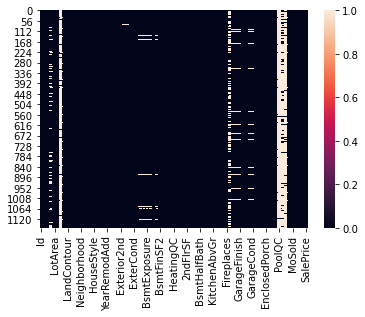

In [15]:
sn.heatmap(df.isnull())

<AxesSubplot:>

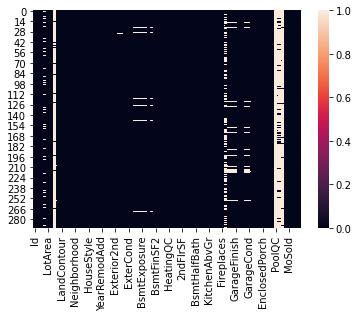

In [16]:
sn.heatmap(df1.isnull())

# analysing datatypes and shape of both training and testing datas

In [17]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

df consist object,int,float type datas

In [18]:
df1.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

df1 also consist object,int,float type datas

In [19]:
df.shape

(1168, 81)

training set have 1168 rows and 81 columns with target

In [20]:
df1.shape

(292, 80)

test data consist 292 rows and 80 feature columns

# columns

In [21]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [22]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

these are the different columns in data

# EDA-TEST DATA(df)

# ANALYSING TARGET VARIABLE

In [23]:
df['SalePrice']

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

OUR TARGET HAS CONTINEOUS VALUES OF PRICE SO WE HAVE TO USE REGRESSION METHOD TO MODEL BUILDING.

# FEATURE COLUMNS:UNIVARIATE ANALYSIS

# COUNT PLOTS

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


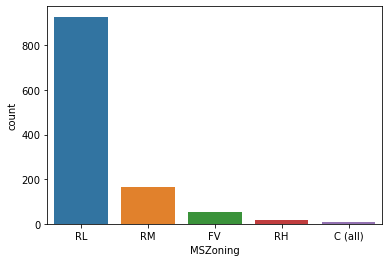

In [24]:
sn.countplot(df['MSZoning'])
print(df["MSZoning"].value_counts())

Pave    1164
Grvl       4
Name: Street, dtype: int64


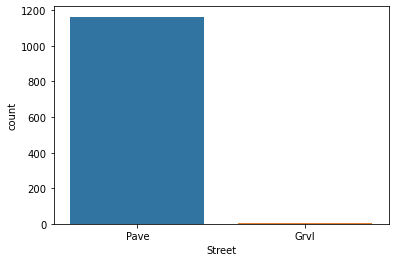

In [25]:
sn.countplot(df['Street'])
print(df["Street"].value_counts())

Grvl    41
Pave    36
Name: Alley, dtype: int64


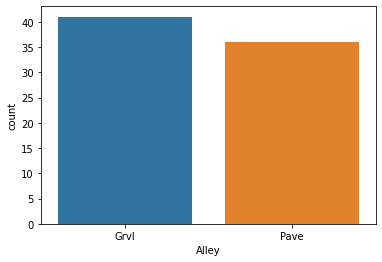

In [26]:
sn.countplot(df['Alley'])
print(df["Alley"].value_counts())

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


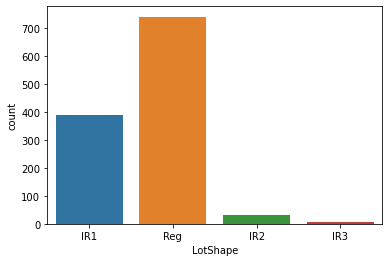

In [27]:
sn.countplot(df['LotShape'])
print(df["LotShape"].value_counts())

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


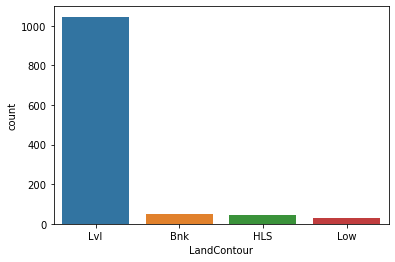

In [28]:
sn.countplot(df['LandContour'])
print(df["LandContour"].value_counts())

AllPub    1168
Name: Utilities, dtype: int64


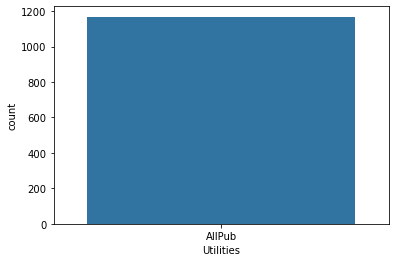

In [29]:
sn.countplot(df['Utilities'])
print(df["Utilities"].value_counts())

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


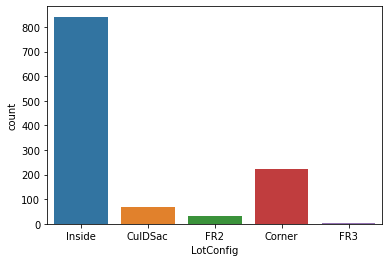

In [30]:
sn.countplot(df['LotConfig'])
print(df["LotConfig"].value_counts())

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


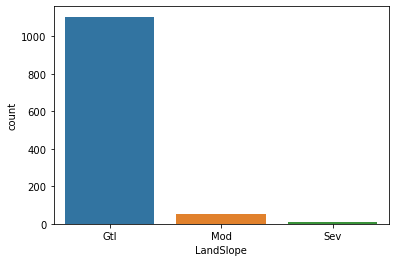

In [31]:
sn.countplot(df['LandSlope'])
print(df["LandSlope"].value_counts())

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


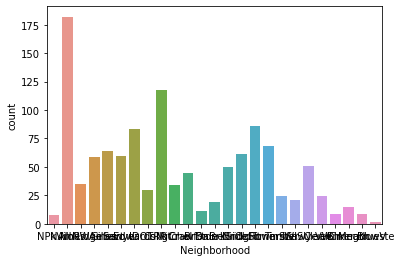

In [32]:
sn.countplot(df['Neighborhood'])
print(df["Neighborhood"].value_counts())

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


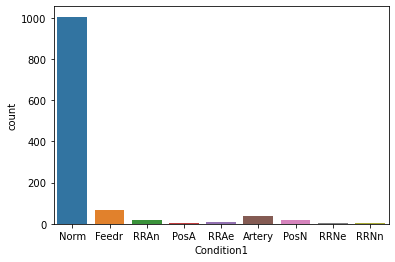

In [33]:
sn.countplot(df['Condition1'])
print(df["Condition1"].value_counts())

Norm      1154
Feedr        6
Artery       2
PosN         2
RRAn         1
RRNn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64


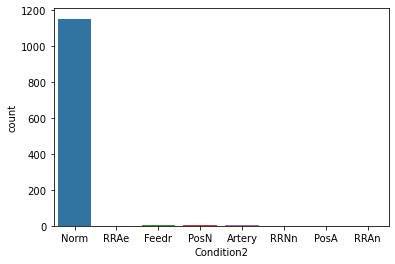

In [34]:
sn.countplot(df['Condition2'])
print(df["Condition2"].value_counts())

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


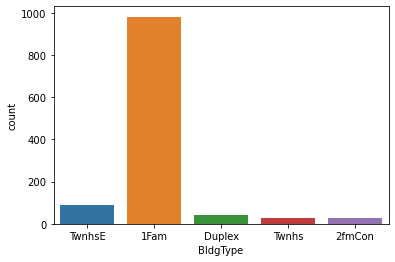

In [35]:
sn.countplot(df['BldgType'])
print(df["BldgType"].value_counts())

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


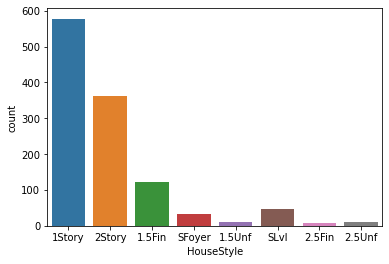

In [36]:
sn.countplot(df['HouseStyle'])
print(df["HouseStyle"].value_counts())

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


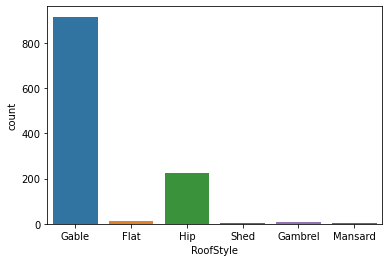

In [37]:
sn.countplot(df['RoofStyle'])
print(df["RoofStyle"].value_counts())

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
Metal         1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64


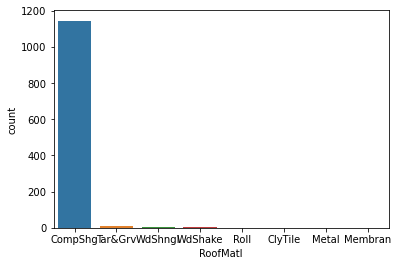

In [38]:
sn.countplot(df['RoofMatl'])
print(df["RoofMatl"].value_counts())

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
AsbShng     19
WdShing     19
Stone        2
BrkComm      1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64


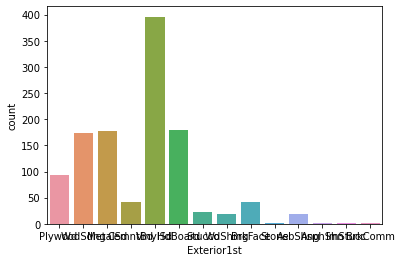

In [39]:
sn.countplot(df['Exterior1st'])
print(df["Exterior1st"].value_counts())

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


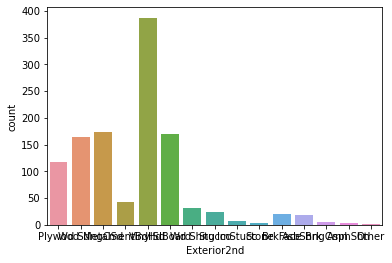

In [40]:
sn.countplot(df['Exterior2nd'])
print(df["Exterior2nd"].value_counts())

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


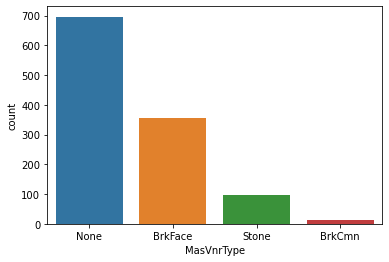

In [41]:
sn.countplot(df['MasVnrType'])
print(df["MasVnrType"].value_counts())

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


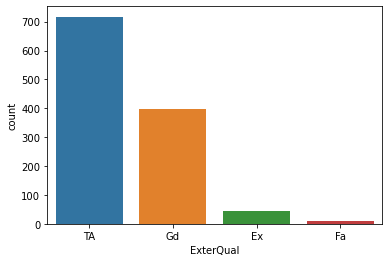

In [42]:
sn.countplot(df['ExterQual'])
print(df["ExterQual"].value_counts())

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


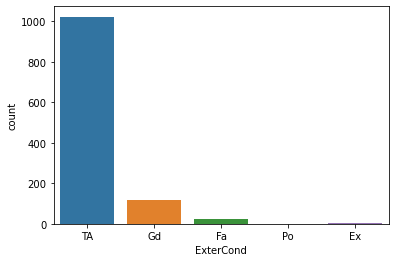

In [43]:
sn.countplot(df['ExterCond'])
print(df["ExterCond"].value_counts())

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


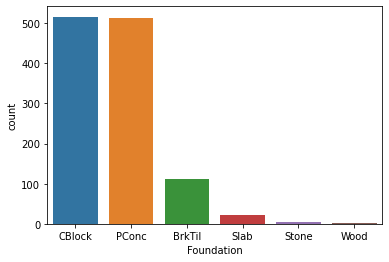

In [44]:
sn.countplot(df['Foundation'])
print(df["Foundation"].value_counts())

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64


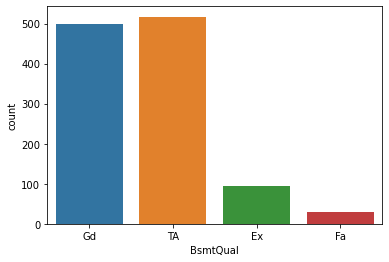

In [45]:
sn.countplot(df['BsmtQual'])
print(df["BsmtQual"].value_counts())

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


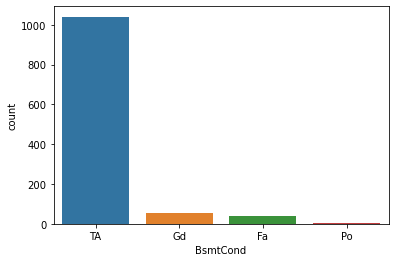

In [46]:
sn.countplot(df['BsmtCond'])
print(df["BsmtCond"].value_counts())

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


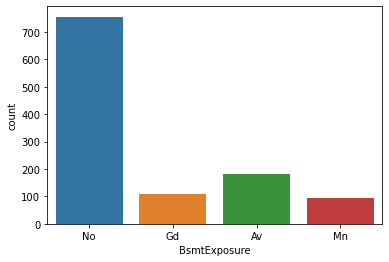

In [47]:
sn.countplot(df['BsmtExposure'])
print(df["BsmtExposure"].value_counts())

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


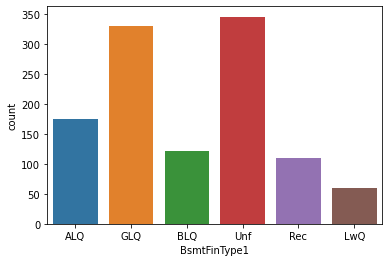

In [48]:
sn.countplot(df['BsmtFinType1'])
print(df["BsmtFinType1"].value_counts())

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


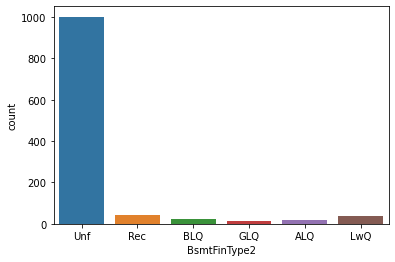

In [49]:
sn.countplot(df['BsmtFinType2'])
print(df["BsmtFinType2"].value_counts())

GasA     1143
GasW       14
Grav        5
Wall        4
OthW        1
Floor       1
Name: Heating, dtype: int64


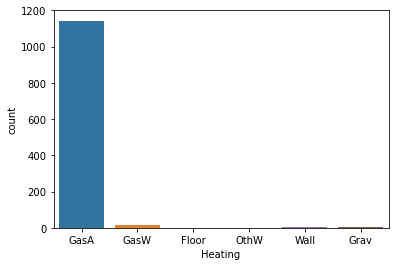

In [50]:
sn.countplot(df['Heating'])
print(df["Heating"].value_counts())

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


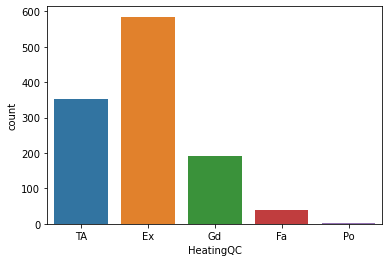

In [51]:
sn.countplot(df['HeatingQC'])
print(df["HeatingQC"].value_counts())

Y    1090
N      78
Name: CentralAir, dtype: int64


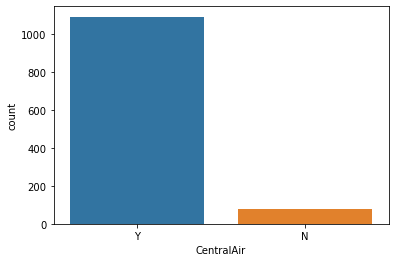

In [52]:
sn.countplot(df['CentralAir'])
print(df["CentralAir"].value_counts())

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


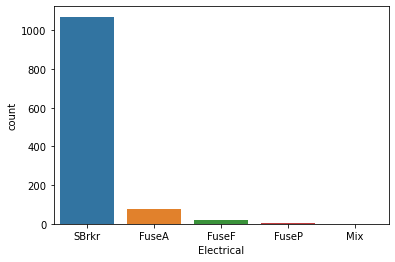

In [53]:
sn.countplot(df['Electrical'])
print(df["Electrical"].value_counts())

TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


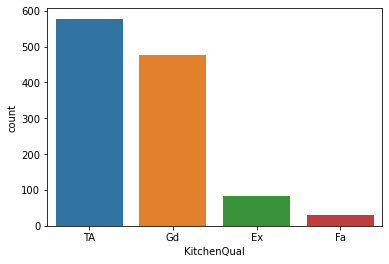

In [54]:
sn.countplot(df['KitchenQual'])
print(df["KitchenQual"].value_counts())

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


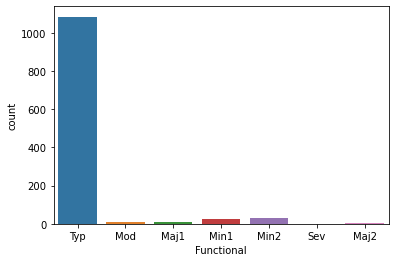

In [55]:
sn.countplot(df['Functional'])
print(df["Functional"].value_counts())

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64


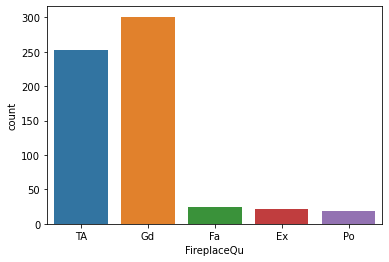

In [56]:
sn.countplot(df['FireplaceQu'])
print(df["FireplaceQu"].value_counts())

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
quality of fire place is good in most cases

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


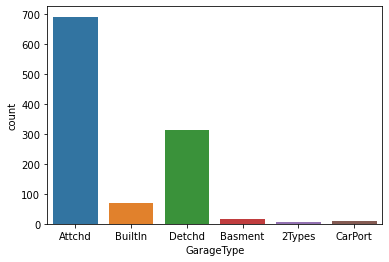

In [57]:
sn.countplot(df['GarageType'])
print(df["GarageType"].value_counts())

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


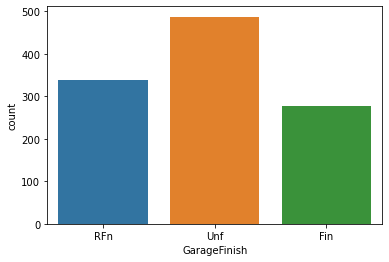

In [58]:
sn.countplot(df['GarageFinish'])
print(df["GarageFinish"].value_counts())

TA    1050
Fa      39
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64


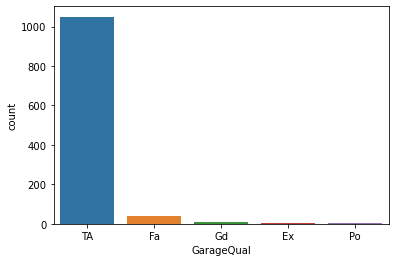

In [59]:
sn.countplot(df['GarageQual'])
print(df["GarageQual"].value_counts())

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


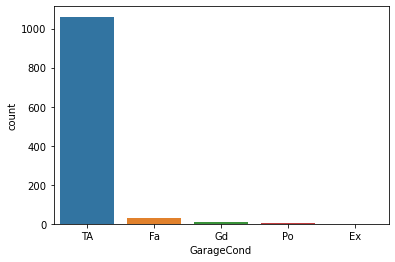

In [60]:
sn.countplot(df['GarageCond'])
print(df["GarageCond"].value_counts())

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


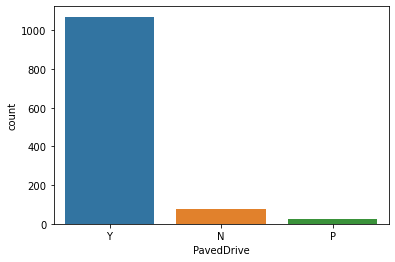

In [61]:
sn.countplot(df['PavedDrive'])
print(df["PavedDrive"].value_counts())

MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64


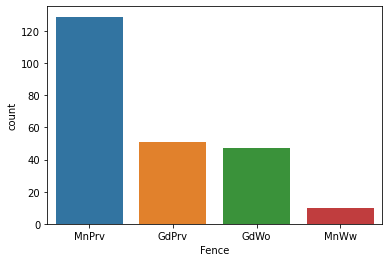

In [62]:
sn.countplot(df['Fence'])
print(df["Fence"].value_counts())

Shed    40
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64


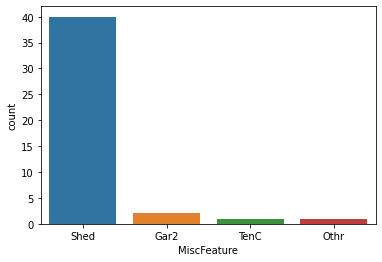

In [63]:
sn.countplot(df['MiscFeature'])
print(df["MiscFeature"].value_counts())

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64


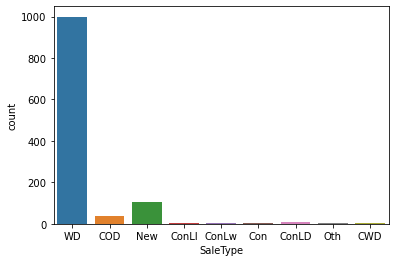

In [64]:
sn.countplot(df['SaleType'])
print(df["SaleType"].value_counts())

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


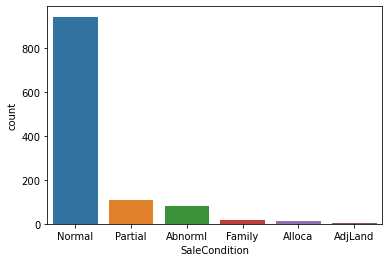

In [65]:
sn.countplot(df['SaleCondition'])
print(df["SaleCondition"].value_counts())

# distribution plot for contineous data columns

<AxesSubplot:xlabel='Id', ylabel='Count'>

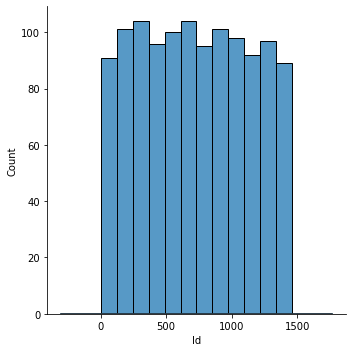

In [66]:
sn.displot(df['Id'])
sn.distplot(df['Id'],fit=norm)

it is not distributed normally,the graph clearley conveys that

<AxesSubplot:xlabel='MSSubClass', ylabel='Count'>

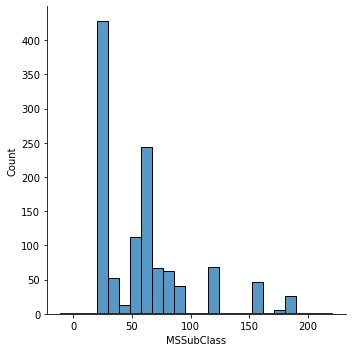

In [67]:
sn.displot(df['MSSubClass'])
sn.distplot(df['MSSubClass'],fit=norm)

skewness is clearley present in the graph

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

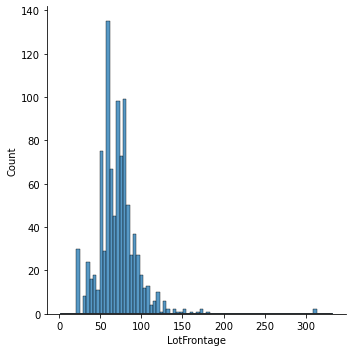

In [68]:
sn.displot(df['LotFrontage'])
sn.distplot(df['LotFrontage'],fit=norm)

this is almost normally distributed

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

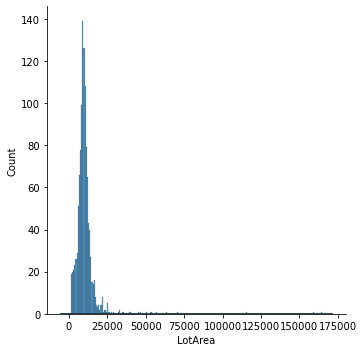

In [69]:
sn.displot(df['LotArea'])
sn.distplot(df['LotArea'],fit=norm)

LotArea is some what normally distributed

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

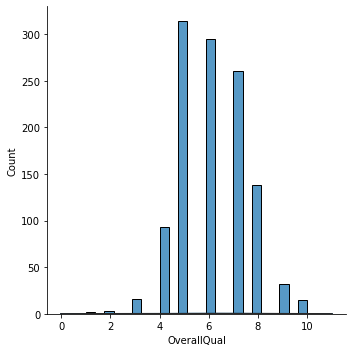

In [70]:
sn.displot(df['OverallQual'])
sn.distplot(df['OverallQual'],fit=norm)

skewness presence is there in OverallQual

<AxesSubplot:xlabel='OverallCond', ylabel='Count'>

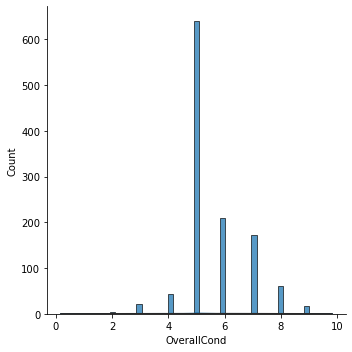

In [71]:
sn.displot(df['OverallCond'])
sn.distplot(df['OverallCond'],fit=norm)

skewness is there in OverallCond

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

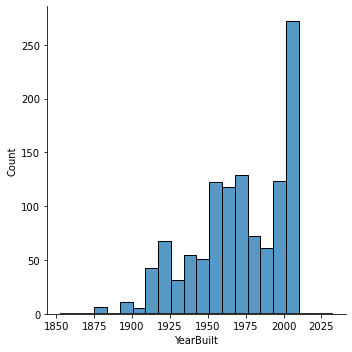

In [72]:
sn.displot(df['YearBuilt'])
sn.distplot(df['YearBuilt'],fit=norm)

positive skewness is visible here

<AxesSubplot:xlabel='YearRemodAdd', ylabel='Count'>

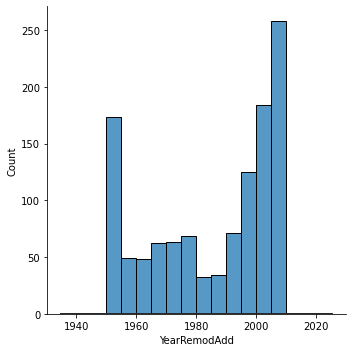

In [73]:
sn.displot(df['YearRemodAdd'])
sn.distplot(df['YearRemodAdd'],fit=norm)

YearRemodAdd is notatall normally distributed

<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

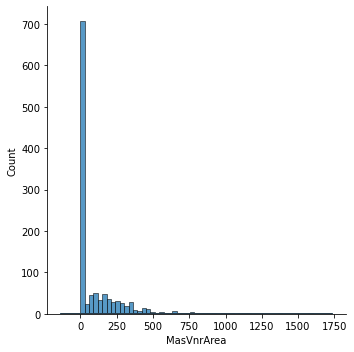

In [74]:
sn.displot(df['MasVnrArea'])
sn.distplot(df['MasVnrArea'],fit=norm)

positive skewness is there in MasVnArea

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='Count'>

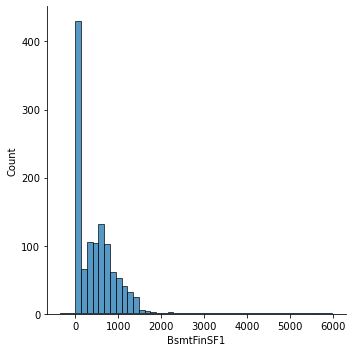

In [75]:
sn.displot(df['BsmtFinSF1'])
sn.distplot(df['BsmtFinSF1'],fit=norm)

BsmtFinSF1 clearley have skewness in data

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='Count'>

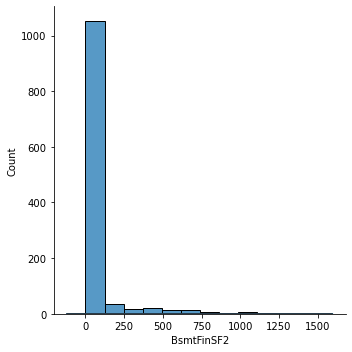

In [76]:
sn.displot(df['BsmtFinSF2'])
sn.distplot(df['BsmtFinSF2'],fit=norm)

negative skewness is there in BsmtFinSF2

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Count'>

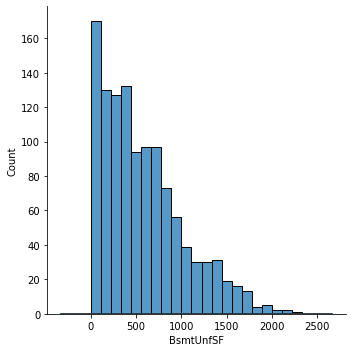

In [77]:
sn.displot(df['BsmtUnfSF'])
sn.distplot(df['BsmtUnfSF'],fit=norm)

BsmtUnfSF has skewness,and it is clear from graph

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Count'>

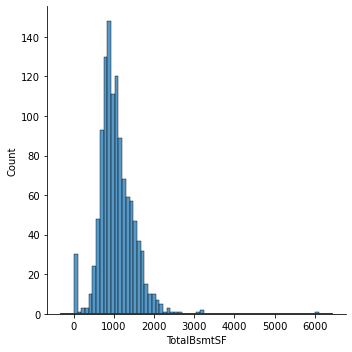

In [78]:
sn.displot(df['TotalBsmtSF'])
sn.distplot(df['TotalBsmtSF'],fit=norm)

data is almost distributed normally,but have some skewnesses 

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

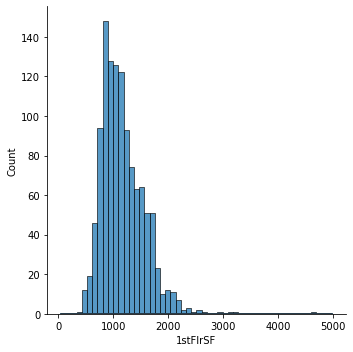

In [79]:
sn.displot(df['1stFlrSF'])
sn.distplot(df['1stFlrSF'],fit=norm)

1stFlrSF is almost normally distributed normally

<AxesSubplot:xlabel='2ndFlrSF', ylabel='Count'>

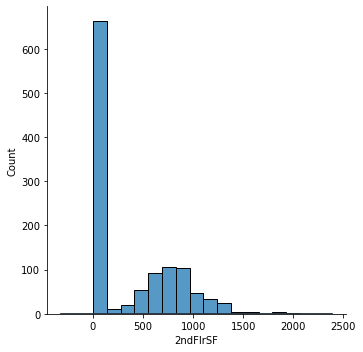

In [80]:
sn.displot(df['2ndFlrSF'])
sn.distplot(df['2ndFlrSF'],fit=norm)

2ndFlrSF clearley have skewness

<AxesSubplot:xlabel='LowQualFinSF', ylabel='Count'>

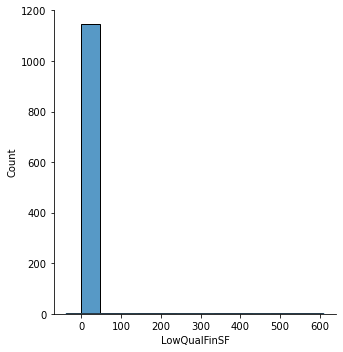

In [81]:
sn.displot(df['LowQualFinSF'])
sn.distplot(df['LowQualFinSF'],fit=norm)

skewness is clearley there in LowQualFinSF

<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

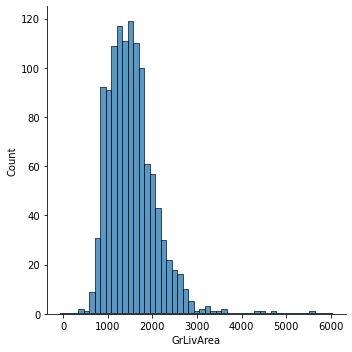

In [82]:
sn.displot(df['GrLivArea'])
sn.distplot(df['GrLivArea'],fit=norm)

GrLivArea is almost normally distributed

<AxesSubplot:xlabel='BsmtFullBath', ylabel='Count'>

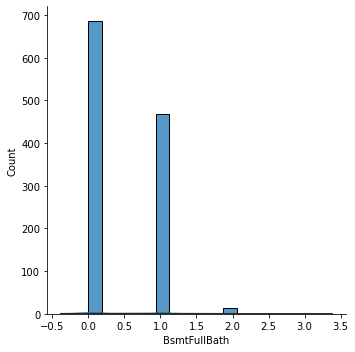

In [83]:
sn.displot(df['BsmtFullBath'])
sn.distplot(df['BsmtFullBath'],fit=norm)

data has skewness in the data

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='Count'>

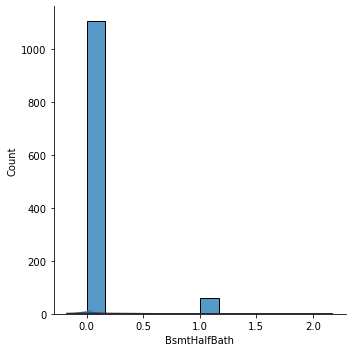

In [84]:
sn.displot(df['BsmtHalfBath'])
sn.distplot(df['BsmtHalfBath'],fit=norm)

BsmtHalfBath have skewness in the data

<AxesSubplot:xlabel='FullBath', ylabel='Count'>

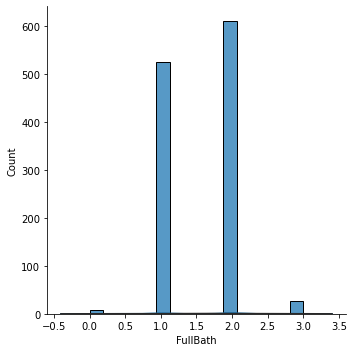

In [85]:
sn.displot(df['FullBath'])
sn.distplot(df['FullBath'],fit=norm)

FullBath have skewness presence

<AxesSubplot:xlabel='HalfBath', ylabel='Count'>

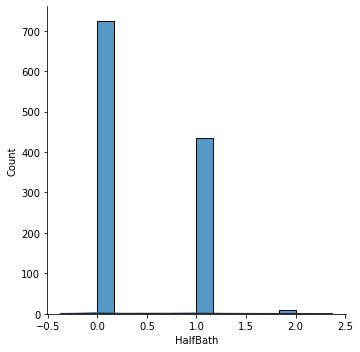

In [86]:
sn.displot(df['HalfBath'])
sn.distplot(df['HalfBath'],fit=norm)

skewness is there in HalfBath

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='Count'>

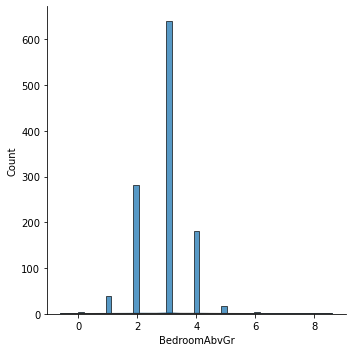

In [87]:
sn.displot(df['BedroomAbvGr'])
sn.distplot(df['BedroomAbvGr'],fit=norm)

BedroomAbvGr has some skeness presence

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='Count'>

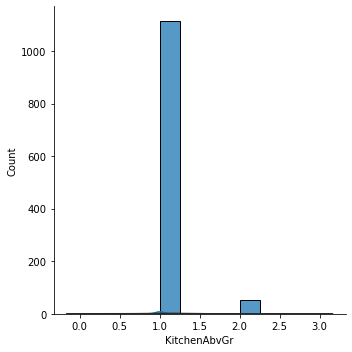

In [88]:
sn.displot(df['KitchenAbvGr'])
sn.distplot(df['KitchenAbvGr'],fit=norm)

KitchenAbvGr clearley have some skewness

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Count'>

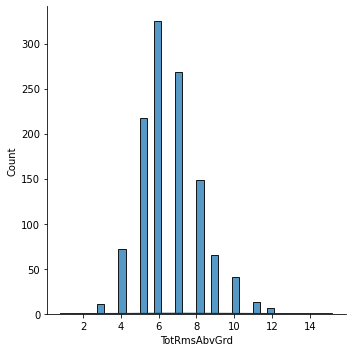

In [89]:
sn.displot(df['TotRmsAbvGrd'])
sn.distplot(df['TotRmsAbvGrd'],fit=norm)

TotRmsAbvGrd has skewness in the value

<AxesSubplot:xlabel='Fireplaces', ylabel='Count'>

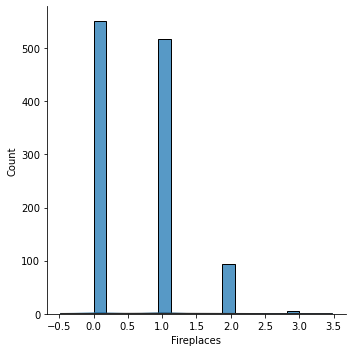

In [90]:
sn.displot(df['Fireplaces'])
sn.distplot(df['Fireplaces'],fit=norm)

skewness is clearley there in Fireplaces

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Count'>

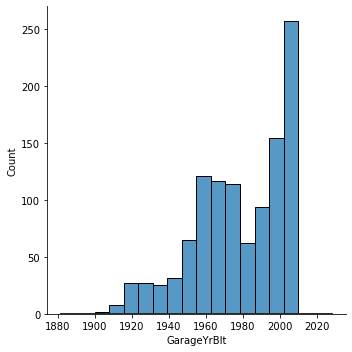

In [91]:
sn.displot(df['GarageYrBlt'])
sn.distplot(df['GarageYrBlt'],fit=norm)

GarageYrBlt clearley have skewness

<AxesSubplot:xlabel='GarageCars', ylabel='Count'>

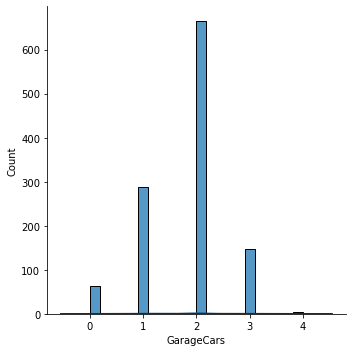

In [92]:
sn.displot(df['GarageCars'])
sn.distplot(df['GarageCars'],fit=norm)

GarageCars has skewness

<AxesSubplot:xlabel='GarageArea', ylabel='Count'>

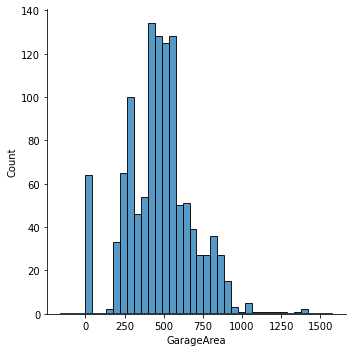

In [93]:
sn.displot(df['GarageArea'])
sn.distplot(df['GarageArea'],fit=norm)

GarageArea contains skewness in data

<AxesSubplot:xlabel='WoodDeckSF', ylabel='Count'>

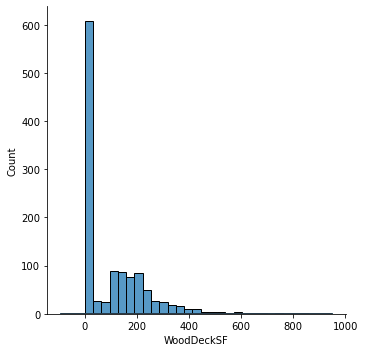

In [94]:
sn.displot(df['WoodDeckSF'])
sn.distplot(df['WoodDeckSF'],fit=norm)

positive skewness is there in data

<AxesSubplot:xlabel='OpenPorchSF', ylabel='Count'>

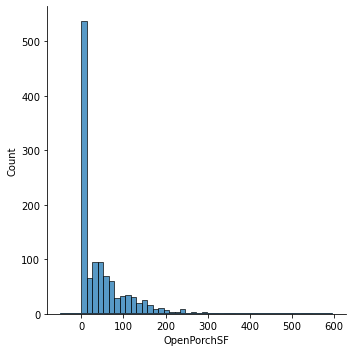

In [95]:
sn.displot(df['OpenPorchSF'])
sn.distplot(df['OpenPorchSF'],fit=norm)

OpenPorchSF has skewness in graph

<AxesSubplot:xlabel='EnclosedPorch', ylabel='Count'>

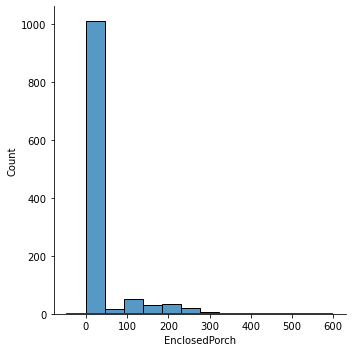

In [96]:
sn.displot(df['EnclosedPorch'])
sn.distplot(df['EnclosedPorch'],fit=norm)

skewness is there in the EnclosedPorch

<AxesSubplot:xlabel='3SsnPorch', ylabel='Count'>

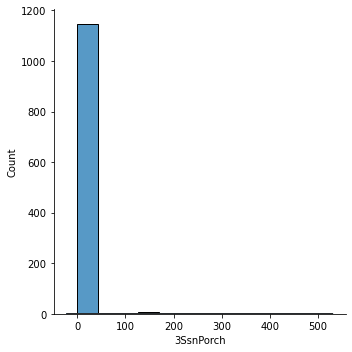

In [97]:
sn.displot(df['3SsnPorch'])
sn.distplot(df['3SsnPorch'],fit=norm)

3SsnPorch contains skewness in data

<AxesSubplot:xlabel='ScreenPorch', ylabel='Count'>

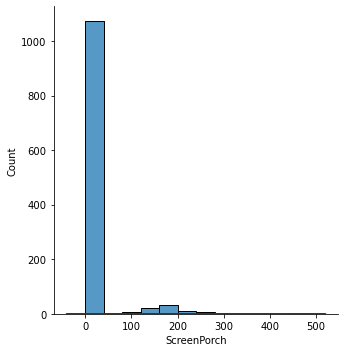

In [98]:
sn.displot(df['ScreenPorch'])
sn.distplot(df['ScreenPorch'],fit=norm)

ScreenPorch has skewness in it

<AxesSubplot:xlabel='PoolArea', ylabel='Count'>

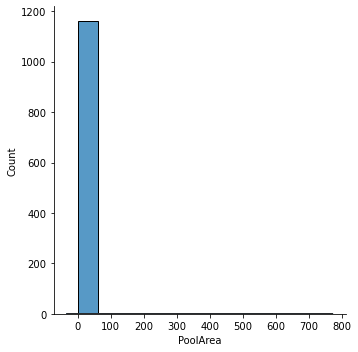

In [99]:
sn.displot(df['PoolArea'])
sn.distplot(df['PoolArea'],fit=norm)

PoolArea has skewness in data

<AxesSubplot:xlabel='MiscVal', ylabel='Count'>

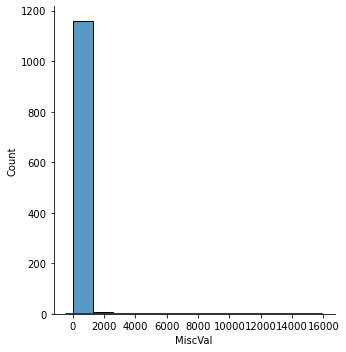

In [100]:
sn.displot(df['MiscVal'])
sn.distplot(df['MiscVal'],fit=norm)

skewness is clearley present in MiscVal

<AxesSubplot:xlabel='YrSold', ylabel='Count'>

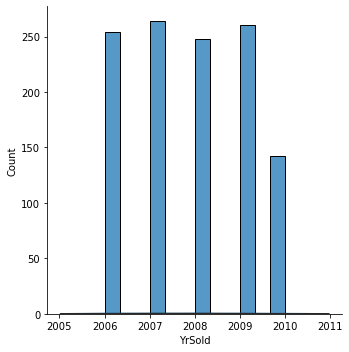

In [101]:
sn.displot(df['YrSold'])
sn.distplot(df['YrSold'],fit=norm)

YrSold has clear skewness in data

# BIVARIATE ANALYSIS

<AxesSubplot:title={'center':'comparison of Street and Foundation'}, xlabel='Street', ylabel='Foundation'>

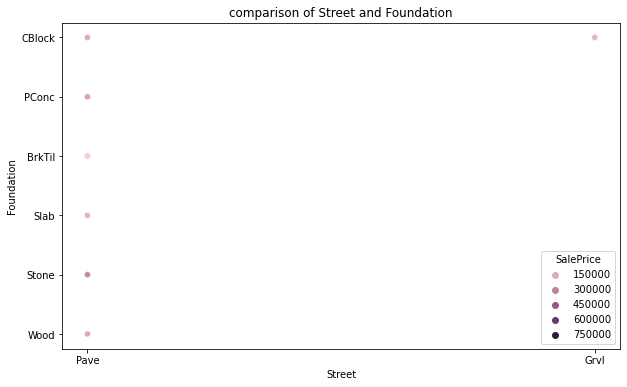

In [102]:
plt.figure(figsize=[10,6])
plt.title('comparison of Street and Foundation')
sn.scatterplot(df['Street'],df['Foundation'],hue=df['SalePrice'])

<AxesSubplot:title={'center':'comparison of Street and Foundation'}, xlabel='OverallQual', ylabel='YearBuilt'>

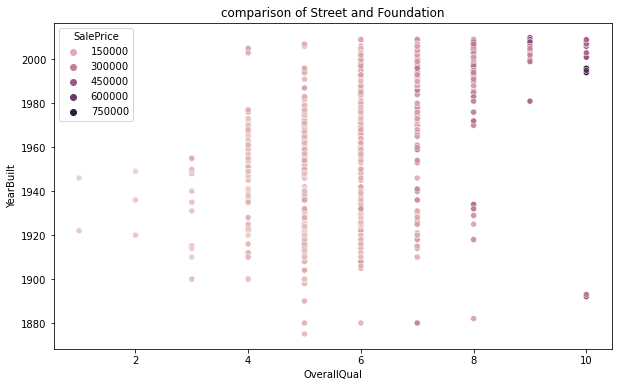

In [103]:
plt.figure(figsize=[10,6])
plt.title('comparison of Street and Foundation')
sn.scatterplot(df['OverallQual'],df['YearBuilt'],hue=df['SalePrice'])

<AxesSubplot:title={'center':'comparison of Street and roofstyle'}, xlabel='Street', ylabel='RoofStyle'>

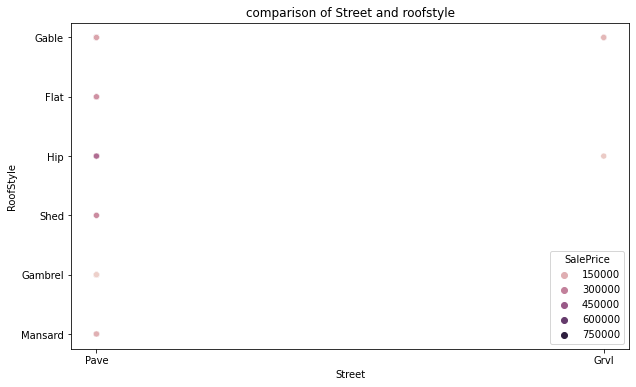

In [104]:
plt.figure(figsize=[10,6])
plt.title('comparison of Street and roofstyle')
sn.scatterplot(df['Street'],df['RoofStyle'],hue=df['SalePrice'])

<AxesSubplot:title={'center':'comparison of GarageType and YearBuilt'}, xlabel='GarageType', ylabel='YearBuilt'>

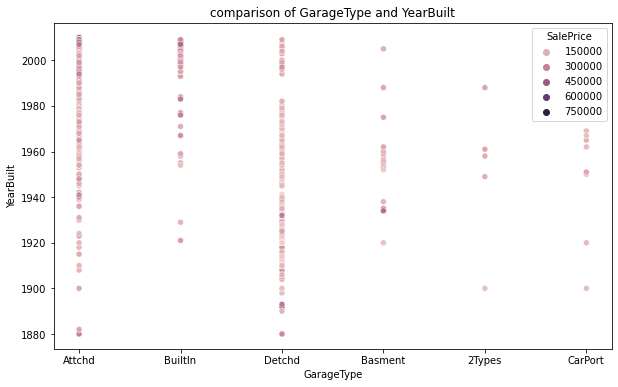

In [105]:
plt.figure(figsize=[10,6])
plt.title('comparison of GarageType and YearBuilt')
sn.scatterplot(df['GarageType'],df['YearBuilt'],hue=df['SalePrice'])

<AxesSubplot:title={'center':'comparison of fence and salesprice'}, xlabel='Fence', ylabel='SalePrice'>

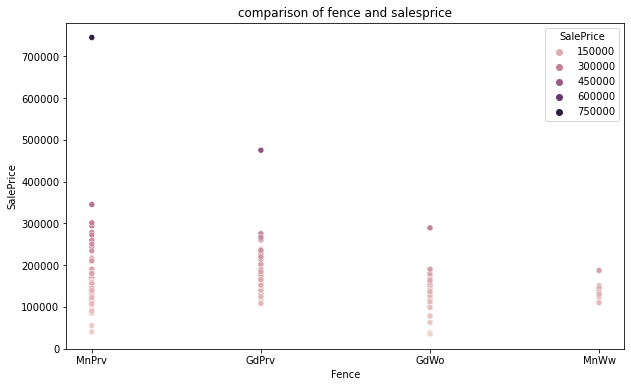

In [106]:
plt.figure(figsize=[10,6])
plt.title('comparison of fence and salesprice')
sn.scatterplot(df['Fence'],df['SalePrice'],hue=df['SalePrice'])

<AxesSubplot:title={'center':'comparison of LotShape and LotArea'}, xlabel='LotShape', ylabel='LotArea'>

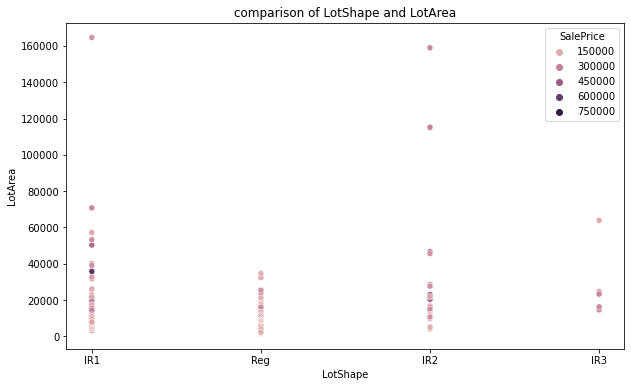

In [107]:
plt.figure(figsize=[10,6])
plt.title('comparison of LotShape and LotArea')
sn.scatterplot(df['LotShape'],df['LotArea'],hue=df['SalePrice'])

<AxesSubplot:title={'center':'comparison of RoofStyle and RoofMatl'}, xlabel='RoofStyle', ylabel='RoofMatl'>

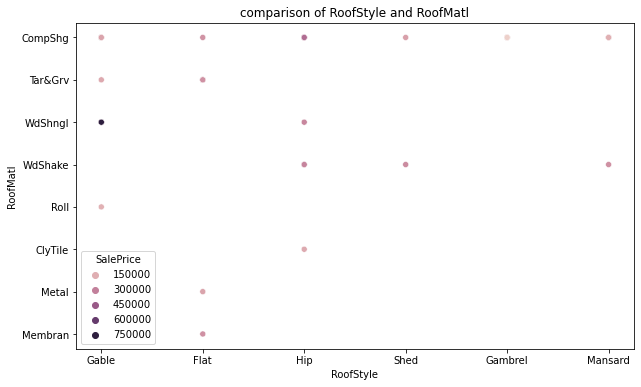

In [108]:
plt.figure(figsize=[10,6])
plt.title('comparison of RoofStyle and RoofMatl')
sn.scatterplot(df['RoofStyle'],df['RoofMatl'],hue=df['SalePrice'])

<AxesSubplot:title={'center':'comparison of SaleType and SaleCondition'}, xlabel='SaleType', ylabel='SaleCondition'>

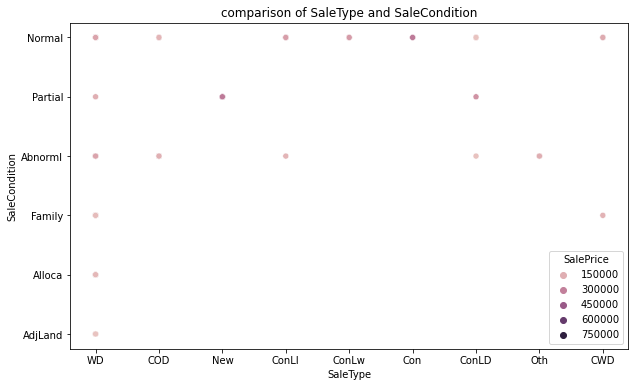

In [109]:
plt.figure(figsize=[10,6])
plt.title('comparison of SaleType and SaleCondition')
sn.scatterplot(df['SaleType'],df['SaleCondition'],hue=df['SalePrice'])

<AxesSubplot:title={'center':'comparison of BsmtQual and '}, xlabel='BsmtQual', ylabel='BsmtCond'>

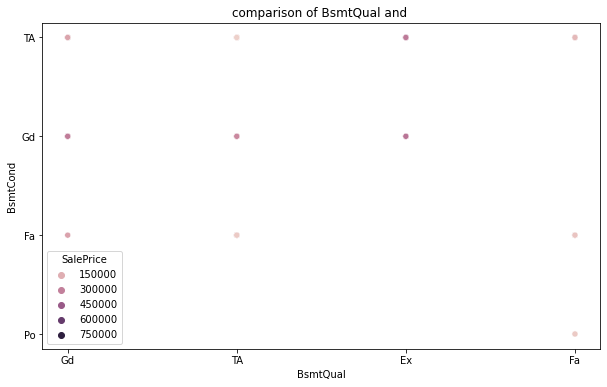

In [110]:
plt.figure(figsize=[10,6])
plt.title('comparison of BsmtQual and ')
sn.scatterplot(df['BsmtQual'],df['BsmtCond'],hue=df['SalePrice'])

<AxesSubplot:title={'center':'comparison of Heating and HeatingQC'}, xlabel='Heating', ylabel='HeatingQC'>

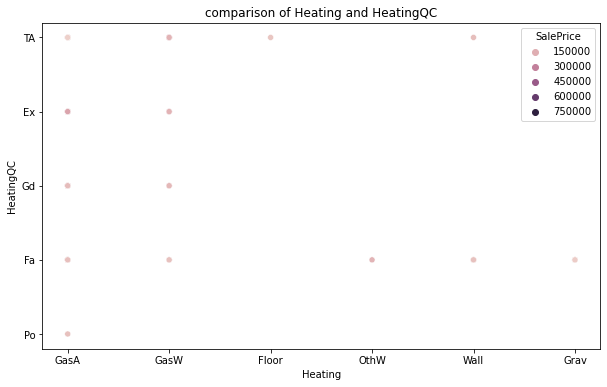

In [111]:
plt.figure(figsize=[10,6])
plt.title('comparison of Heating and HeatingQC')
sn.scatterplot(df['Heating'],df['HeatingQC'],hue=df['SalePrice'])

<AxesSubplot:title={'center':'comparison of HouseStyle  and OverallQual '}, xlabel='HouseStyle', ylabel='OverallQual'>

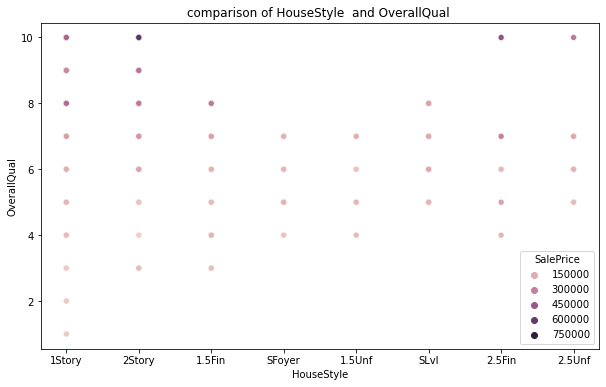

In [112]:
plt.figure(figsize=[10,6])
plt.title('comparison of HouseStyle  and OverallQual ')
sn.scatterplot(df['HouseStyle'],df['OverallQual'],hue=df['SalePrice'])

<AxesSubplot:title={'center':'comparison of LandContour and LandSlope'}, xlabel='LandContour', ylabel='LandSlope'>

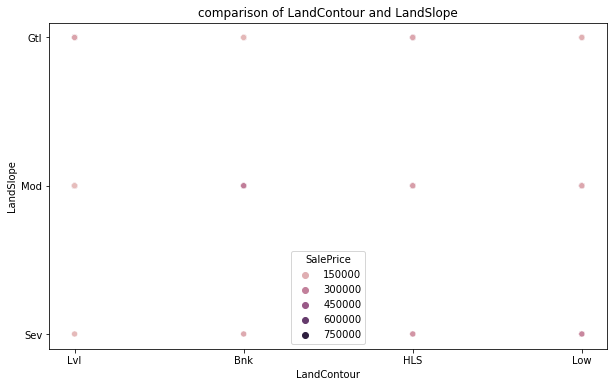

In [113]:
plt.figure(figsize=[10,6])
plt.title('comparison of LandContour and LandSlope')
sn.scatterplot(df['LandContour'],df['LandSlope'],hue=df['SalePrice'])

<AxesSubplot:title={'center':'comparison of BsmtQual and BsmtCond'}, xlabel='BsmtQual', ylabel='BsmtCond'>

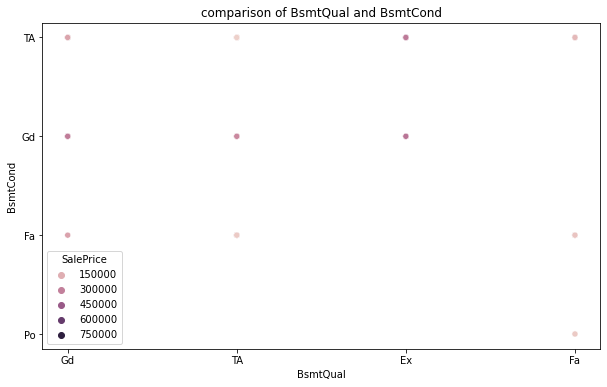

In [114]:
plt.figure(figsize=[10,6])
plt.title('comparison of BsmtQual and BsmtCond')
sn.scatterplot(df['BsmtQual'],df['BsmtCond'],hue=df['SalePrice'])

<AxesSubplot:title={'center':'comparison of PoolArea and PoolQC'}, xlabel='PoolArea', ylabel='PoolQC'>

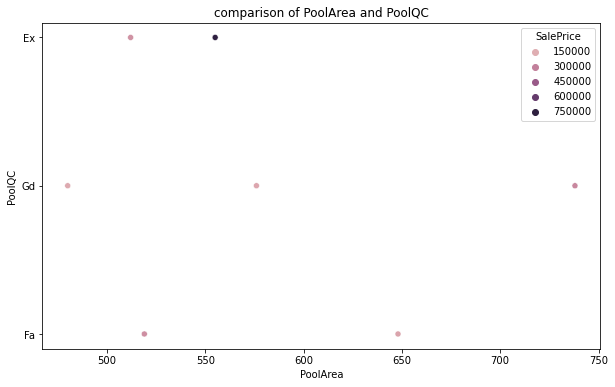

In [115]:
plt.figure(figsize=[10,6])
plt.title('comparison of PoolArea and PoolQC')
sn.scatterplot(df['PoolArea'],df['PoolQC'],hue=df['SalePrice'])

# TREATING SOME COLUMNS

Treating some columns mannually ,some columns are univariable and others have huge missing datas,here treating such columns

In [116]:
df.drop(['Street'],axis=1,inplace=True)

In [117]:
df.drop(['Alley'],axis=1,inplace=True)

In [118]:
df.drop(['PoolQC'],axis=1,inplace=True)

In [119]:
df.drop(['Fence'],axis=1,inplace=True)

In [120]:
df.drop(['MiscFeature'],axis=1,inplace=True)

In [121]:
df.drop(['LotFrontage'],axis=1,inplace=True)

In [122]:
df.drop(['FireplaceQu'],axis=1,inplace=True)

In [123]:
df.drop(['LandContour'],axis=1,inplace=True)

In [124]:
df.drop(['LandSlope'],axis=1,inplace=True)

In [125]:
df.drop(['Condition2'],axis=1,inplace=True)

In [126]:
df.drop(['Condition1'],axis=1,inplace=True)

In [127]:
df.drop(['BldgType'],axis=1,inplace=True)

In [128]:
df.drop(['RoofMatl'],axis=1,inplace=True)

In [129]:
df.drop(['Heating'],axis=1,inplace=True)

In [130]:
df.drop(['Functional'],axis=1,inplace=True)

In [131]:
df.drop(['BsmtFinSF2'],axis=1,inplace=True)

In [132]:
df.drop(['LowQualFinSF'],axis=1,inplace=True)

In [133]:
df.drop(['BsmtFullBath'],axis=1,inplace=True)

In [134]:
df.drop(['BsmtHalfBath'],axis=1,inplace=True)

In [135]:
df.drop(['KitchenAbvGr'],axis=1,inplace=True)

In [136]:
df.drop(['EnclosedPorch'],axis=1,inplace=True)

In [137]:
df.drop(['3SsnPorch'],axis=1,inplace=True)

In [138]:
df.drop(['ScreenPorch'],axis=1,inplace=True)

In [139]:
df.drop(['PoolArea'],axis=1,inplace=True)

In [140]:
df.drop(['MiscVal'],axis=1,inplace=True)

In [141]:
df.drop(['MasVnrType'],axis=1,inplace=True)

In [142]:
df.drop(['Utilities'],axis=1,inplace=True)

In [143]:
df

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,4928,IR1,Inside,NPkVill,1Story,6,5,...,TA,TA,Y,0,205,2,2007,WD,Normal,128000
1,889,20,RL,15865,IR1,Inside,NAmes,1Story,8,6,...,TA,TA,Y,81,207,10,2007,WD,Normal,268000
2,793,60,RL,9920,IR1,CulDSac,NoRidge,2Story,7,5,...,TA,TA,Y,180,130,6,2007,WD,Normal,269790
3,110,20,RL,11751,IR1,Inside,NWAmes,1Story,6,6,...,TA,TA,Y,0,122,1,2010,COD,Normal,190000
4,422,20,RL,16635,IR1,FR2,NWAmes,1Story,6,7,...,TA,TA,Y,240,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,9819,IR1,Inside,Sawyer,1Story,5,5,...,TA,TA,Y,0,0,2,2010,WD,Normal,122000
1164,554,20,RL,8777,Reg,Inside,Edwards,1Story,4,5,...,TA,TA,N,0,96,5,2009,WD,Normal,108000
1165,196,160,RL,2280,Reg,FR2,NPkVill,2Story,6,6,...,TA,TA,Y,87,0,7,2009,WD,Normal,148500
1166,31,70,C (all),8500,Reg,Inside,IDOTRR,2Story,4,4,...,TA,Fa,N,0,54,7,2008,WD,Normal,40000


In [144]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

# TREATING NULL VALUES

In [145]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
LotShape          0
LotConfig         0
Neighborhood      0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrArea        7
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         30
BsmtCond         30
BsmtExposure     31
BsmtFinType1     30
BsmtFinSF1        0
BsmtFinType2     31
BsmtUnfSF         0
TotalBsmtSF       0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Fireplaces        0
GarageType       64
GarageYrBlt      64
GarageFinish     64
GarageCars        0
GarageArea        0
GarageQual       64
GarageCond       64
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
MoSold            0


In [146]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotArea            int64
LotShape          object
LotConfig         object
Neighborhood      object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Fireplaces         int64
GarageType        object


for treating null values categorical data handle by mode and contineous data handle by mean

In [147]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [148]:
df['BsmtQual'].mode()

0    TA
dtype: object

In [149]:
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [150]:
df['BsmtCond'].mode()

0    TA
dtype: object

In [151]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [152]:
df['BsmtExposure'].mode()

0    No
dtype: object

In [153]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [154]:
df['BsmtFinType1'].mode()

0    Unf
dtype: object

In [155]:
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [156]:
df['BsmtFinType2'].mode()

0    Unf
dtype: object

In [157]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [158]:
df['GarageType'].mode()

0    Attchd
dtype: object

In [159]:
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [160]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [161]:
df['GarageFinish'].mode()

0    Unf
dtype: object

In [162]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [163]:
df['GarageQual'].mode()

0    TA
dtype: object

In [164]:
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])

In [165]:
df['GarageCond'].mode()

0    TA
dtype: object

In [166]:
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [167]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
MoSold           0
YrSold           0
SaleType         0
SaleConditio

<AxesSubplot:>

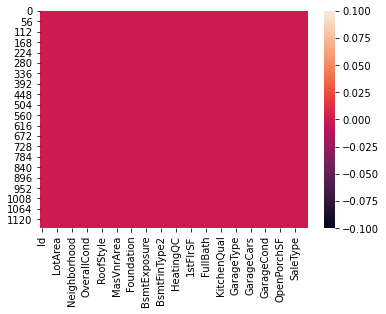

In [168]:
sn.heatmap(df.isnull())

the presence of null value problem cleared

# multivariate analysis

In [ ]:
sn.pairplot(df,hue="SalePrice")

# PLOTTING BOX PLOT FOR CHECKING OUTLIERS

<AxesSubplot:xlabel='Id'>

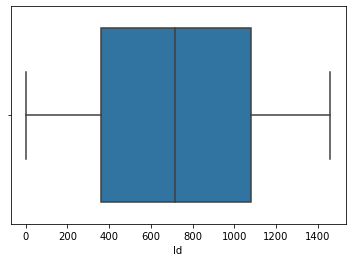

In [170]:
sn.boxplot(df['Id'])

<AxesSubplot:xlabel='MSSubClass'>

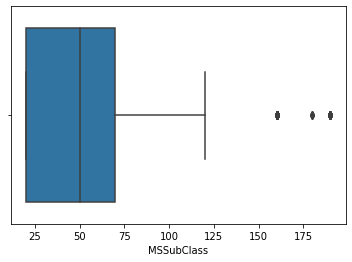

In [171]:
sn.boxplot(df['MSSubClass'])

<AxesSubplot:xlabel='LotArea'>

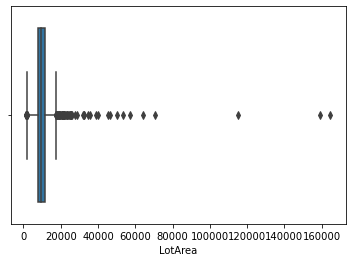

In [172]:
sn.boxplot(df['LotArea'])

<AxesSubplot:xlabel='OverallQual'>

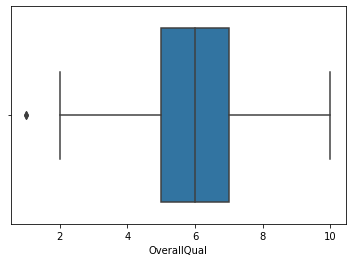

In [173]:
sn.boxplot(df['OverallQual'])

<AxesSubplot:xlabel='OverallCond'>

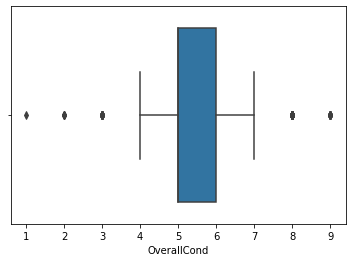

In [174]:
sn.boxplot(df['OverallCond'])

<AxesSubplot:xlabel='YearBuilt'>

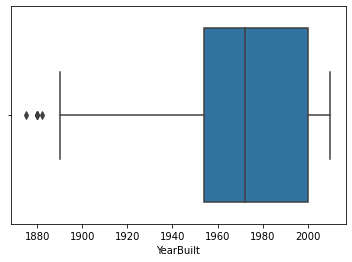

In [175]:
sn.boxplot(df['YearBuilt'])

<AxesSubplot:xlabel='YearRemodAdd'>

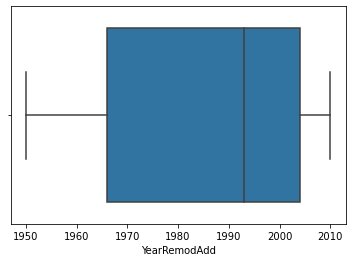

In [176]:
sn.boxplot(df['YearRemodAdd'])

<AxesSubplot:xlabel='MasVnrArea'>

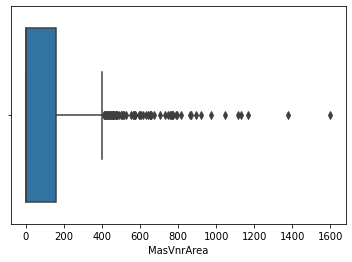

In [177]:
sn.boxplot(df['MasVnrArea'])

<AxesSubplot:xlabel='BsmtFinSF1'>

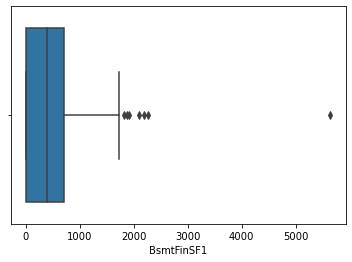

In [178]:
sn.boxplot(df['BsmtFinSF1'])

<AxesSubplot:xlabel='BsmtUnfSF'>

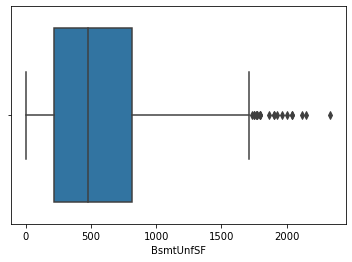

In [179]:
sn.boxplot(df['BsmtUnfSF'])

<AxesSubplot:xlabel='TotalBsmtSF'>

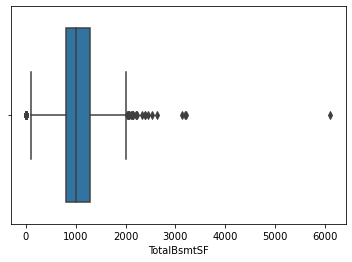

In [180]:
sn.boxplot(df['TotalBsmtSF'])

<AxesSubplot:xlabel='1stFlrSF'>

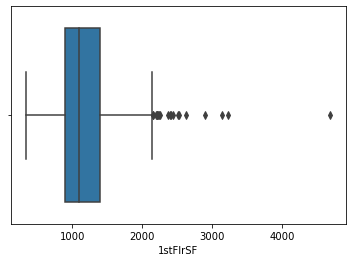

In [181]:
sn.boxplot(df['1stFlrSF'])

<AxesSubplot:xlabel='2ndFlrSF'>

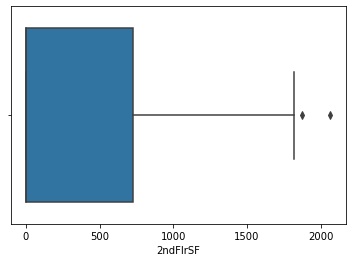

In [182]:
sn.boxplot(df['2ndFlrSF'])

<AxesSubplot:xlabel='GrLivArea'>

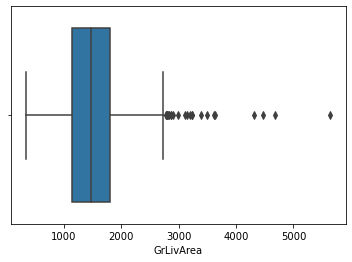

In [183]:
sn.boxplot(df['GrLivArea'])

<AxesSubplot:xlabel='FullBath'>

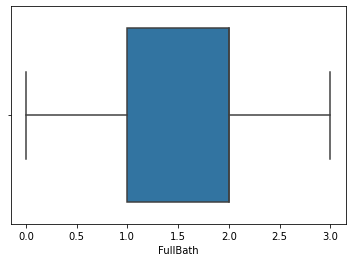

In [184]:
sn.boxplot(df['FullBath'])

<AxesSubplot:xlabel='HalfBath'>

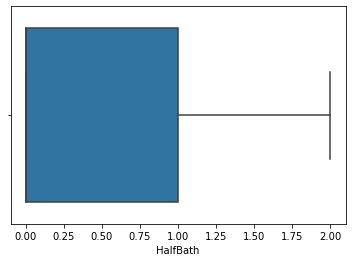

In [185]:
sn.boxplot(df['HalfBath'])

<AxesSubplot:xlabel='BedroomAbvGr'>

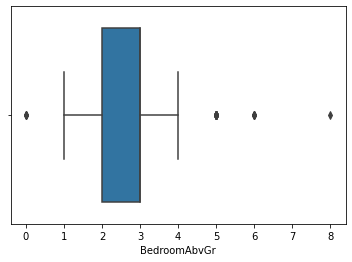

In [186]:
sn.boxplot(df['BedroomAbvGr'])

<AxesSubplot:xlabel='TotRmsAbvGrd'>

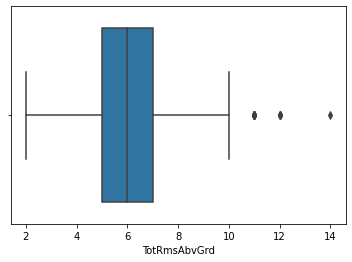

In [187]:
sn.boxplot(df['TotRmsAbvGrd'])

<AxesSubplot:xlabel='Fireplaces'>

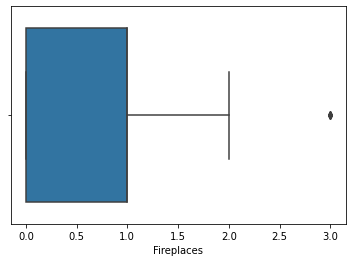

In [188]:
sn.boxplot(df['Fireplaces'])

<AxesSubplot:xlabel='GarageYrBlt'>

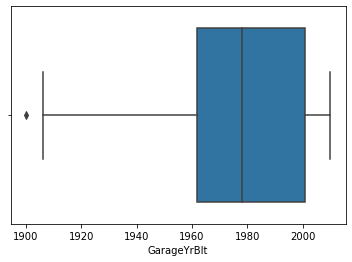

In [189]:
sn.boxplot(df['GarageYrBlt'])

<AxesSubplot:xlabel='GarageCars'>

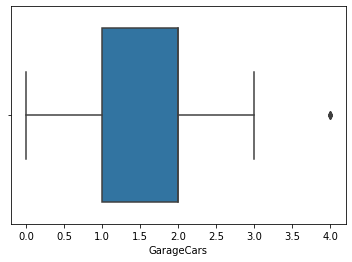

In [190]:
sn.boxplot(df['GarageCars'])

<AxesSubplot:xlabel='GarageArea'>

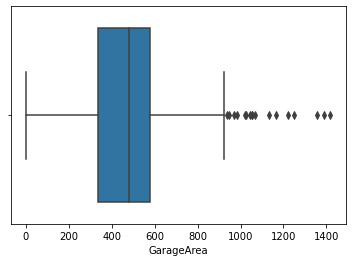

In [191]:
sn.boxplot(df['GarageArea'])

<AxesSubplot:xlabel='WoodDeckSF'>

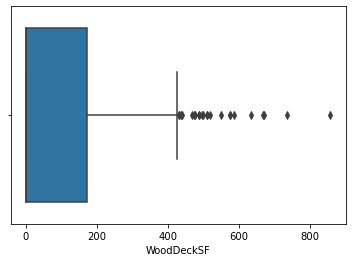

In [192]:
sn.boxplot(df['WoodDeckSF'])

<AxesSubplot:xlabel='OpenPorchSF'>

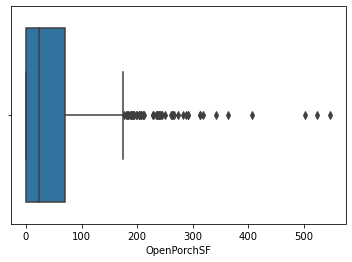

In [193]:
sn.boxplot(df['OpenPorchSF'])

<AxesSubplot:xlabel='MoSold'>

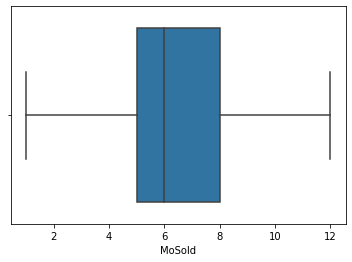

In [194]:
sn.boxplot(df['MoSold'])

<AxesSubplot:xlabel='YrSold'>

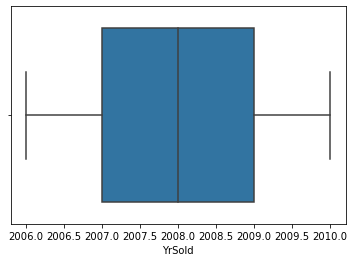

In [195]:
sn.boxplot(df['YrSold'])

many columns consisting outliers

# ENCODING

MANY OBJECT DTYPES ARE THERE IN DATASET

In [196]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [197]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [198]:
df

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3.0,4928,0.0,4.0,13.0,2.0,6,5,...,4.0,4.0,2.0,0,205,2,2007,8.0,4.0,128000
1,889,20,3.0,15865,0.0,4.0,12.0,2.0,8,6,...,4.0,4.0,2.0,81,207,10,2007,8.0,4.0,268000
2,793,60,3.0,9920,0.0,1.0,15.0,5.0,7,5,...,4.0,4.0,2.0,180,130,6,2007,8.0,4.0,269790
3,110,20,3.0,11751,0.0,4.0,14.0,2.0,6,6,...,4.0,4.0,2.0,0,122,1,2010,0.0,4.0,190000
4,422,20,3.0,16635,0.0,2.0,14.0,2.0,6,7,...,4.0,4.0,2.0,240,0,6,2009,8.0,4.0,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3.0,9819,0.0,4.0,19.0,2.0,5,5,...,4.0,4.0,2.0,0,0,2,2010,8.0,4.0,122000
1164,554,20,3.0,8777,3.0,4.0,7.0,2.0,4,5,...,4.0,4.0,0.0,0,96,5,2009,8.0,4.0,108000
1165,196,160,3.0,2280,3.0,2.0,13.0,5.0,6,6,...,4.0,4.0,2.0,87,0,7,2009,8.0,4.0,148500
1166,31,70,0.0,8500,3.0,4.0,9.0,5.0,4,4,...,4.0,1.0,0.0,0,54,7,2008,8.0,4.0,40000


In [199]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning         float64
LotArea            int64
LotShape         float64
LotConfig        float64
Neighborhood     float64
HouseStyle       float64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle        float64
Exterior1st      float64
Exterior2nd      float64
MasVnrArea       float64
ExterQual        float64
ExterCond        float64
Foundation       float64
BsmtQual         float64
BsmtCond         float64
BsmtExposure     float64
BsmtFinType1     float64
BsmtFinSF1         int64
BsmtFinType2     float64
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC        float64
CentralAir       float64
Electrical       float64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenQual      float64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageType       float64


# CORRELATION AND HEATMAP

In [200]:
df.describe()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,3.013699,10484.749144,1.938356,3.004281,12.145548,3.043664,6.104452,5.595890,...,3.872432,3.905822,1.853596,96.206336,46.559932,6.344178,2007.804795,7.465753,3.768836,181477.005993
std,416.159877,41.940650,0.633120,8957.442311,1.412262,1.642667,6.010364,1.898625,1.390153,1.124343,...,0.592724,0.503323,0.501894,126.158988,66.381023,2.686352,1.329738,1.619459,1.112208,79105.586863
min,1.000000,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,360.500000,20.000000,3.000000,7621.500000,0.000000,2.000000,7.000000,2.000000,5.000000,5.000000,...,4.000000,4.000000,2.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,130375.000000
50%,714.500000,50.000000,3.000000,9522.500000,3.000000,4.000000,12.000000,2.000000,6.000000,5.000000,...,4.000000,4.000000,2.000000,0.000000,24.000000,6.000000,2008.000000,8.000000,4.000000,163995.000000
75%,1079.500000,70.000000,3.000000,11515.500000,3.000000,4.000000,17.000000,5.000000,7.000000,6.000000,...,4.000000,4.000000,2.000000,171.000000,70.000000,8.000000,2009.000000,8.000000,4.000000,215000.000000
max,1460.000000,190.000000,4.000000,164660.000000,3.000000,4.000000,24.000000,7.000000,10.000000,9.000000,...,4.000000,4.000000,2.000000,857.000000,547.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


In [201]:
cor=df.corr()

In [202]:
cor

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.004259,0.009307,-0.029212,0.022978,0.053927,-0.014989,0.014518,-0.036965,0.039761,...,-0.007857,-0.005130,-0.009755,-0.027498,-0.013642,0.023479,-0.008853,0.024384,-0.014726,-0.023897
MSSubClass,0.004259,1.000000,0.007478,-0.124151,0.104485,0.076880,0.013918,0.381585,0.070462,-0.056978,...,-0.010568,-0.025595,-0.068702,-0.022609,0.017468,-0.016015,-0.038595,0.035050,-0.028981,-0.060775
MSZoning,0.009307,0.007478,1.000000,-0.023328,0.053655,-0.027246,-0.251833,-0.110991,-0.134037,0.189553,...,-0.168881,-0.087375,-0.077280,-0.004509,-0.152694,-0.051646,-0.004964,0.079854,0.004501,-0.133221
LotArea,-0.029212,-0.124151,-0.023328,1.000000,-0.189201,-0.152063,0.010707,-0.040637,0.107188,0.017513,...,0.005999,0.035657,0.021907,0.216720,0.093080,0.015141,-0.035399,0.005421,0.034236,0.249499
LotShape,0.022978,0.104485,0.053655,-0.189201,1.000000,0.211395,-0.031852,-0.116280,-0.189636,0.026931,...,-0.097438,-0.068449,-0.122756,-0.142202,-0.090534,-0.050418,0.021421,-0.015161,-0.054905,-0.248171
LotConfig,0.053927,0.076880,-0.027246,-0.152063,0.211395,1.000000,-0.030440,-0.039075,-0.031717,-0.027364,...,0.033125,0.034690,-0.034578,-0.042424,-0.052485,0.019084,-0.009817,-0.002039,0.043692,-0.060452
Neighborhood,-0.014989,0.013918,-0.251833,0.010707,-0.031852,-0.030440,1.000000,0.038565,0.184320,-0.040615,...,0.000887,0.016998,0.037749,0.053138,0.149294,0.023378,0.026181,-0.023081,0.042340,0.198942
HouseStyle,0.014518,0.381585,-0.110991,-0.040637,-0.116280,-0.039075,0.038565,1.000000,0.252154,-0.021833,...,0.031604,-0.029767,0.103833,0.072763,0.161262,0.030316,-0.006124,0.056643,0.024668,0.205502
OverallQual,-0.036965,0.070462,-0.134037,0.107188,-0.189636,-0.031717,0.184320,0.252154,1.000000,-0.083167,...,0.087942,0.136538,0.215985,0.227137,0.341030,0.090638,-0.048759,-0.049794,0.212932,0.789185
OverallCond,0.039761,-0.056978,0.189553,0.017513,0.026931,-0.027364,-0.040615,-0.021833,-0.083167,1.000000,...,-0.097995,-0.018855,-0.051785,0.012290,-0.024899,0.005519,0.055517,0.102515,0.023908,-0.065642


<AxesSubplot:>

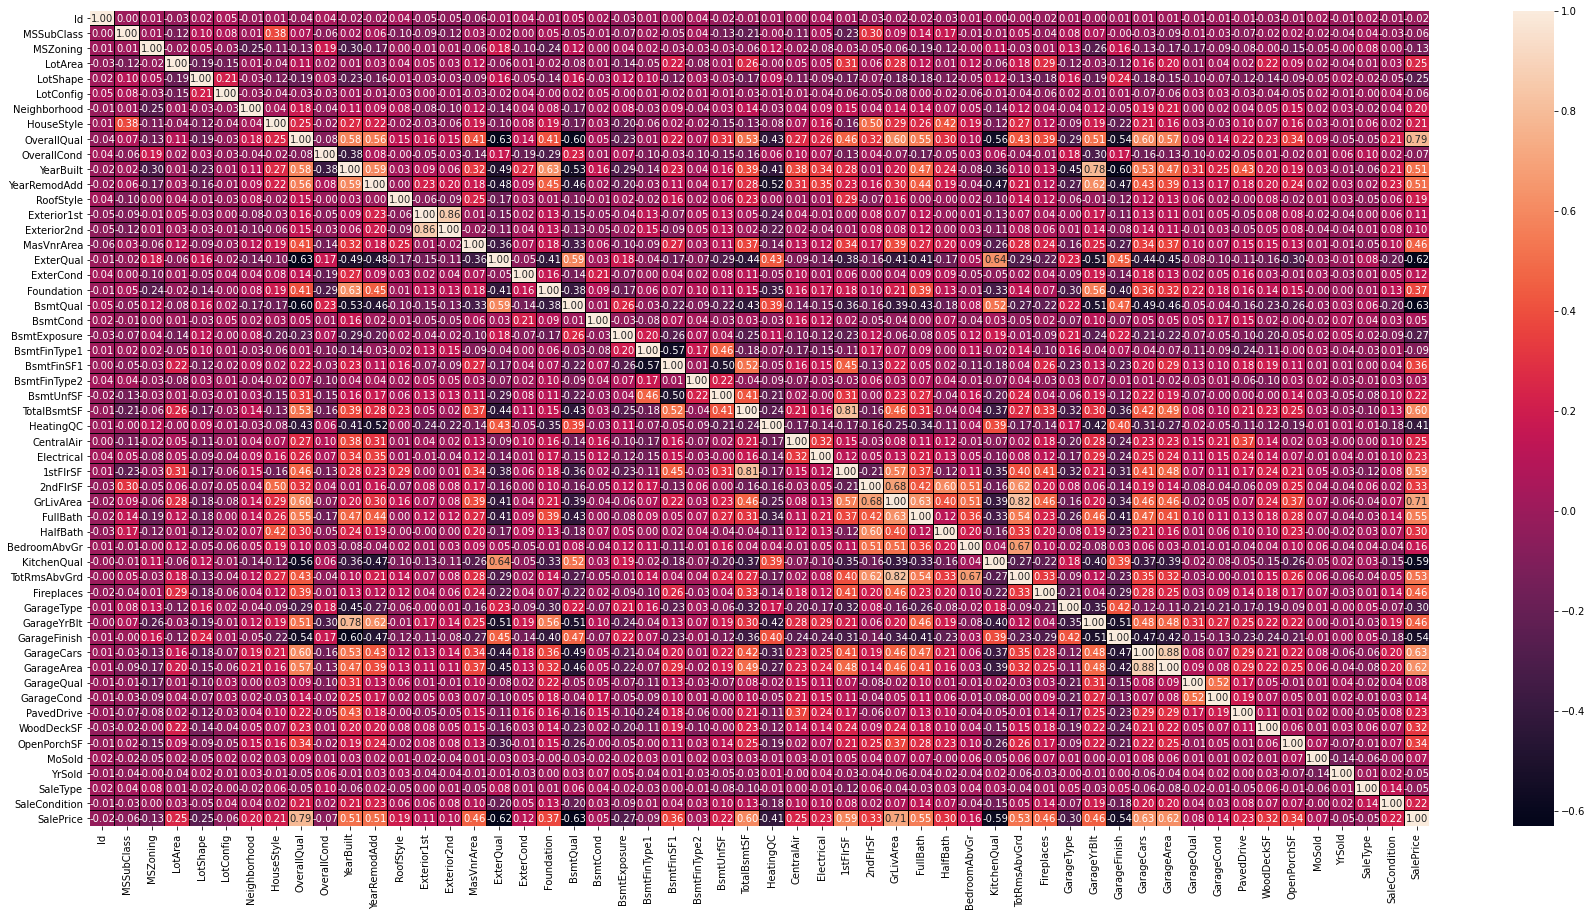

In [203]:
plt.figure(figsize=(30,15))
sn.heatmap(cor,annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

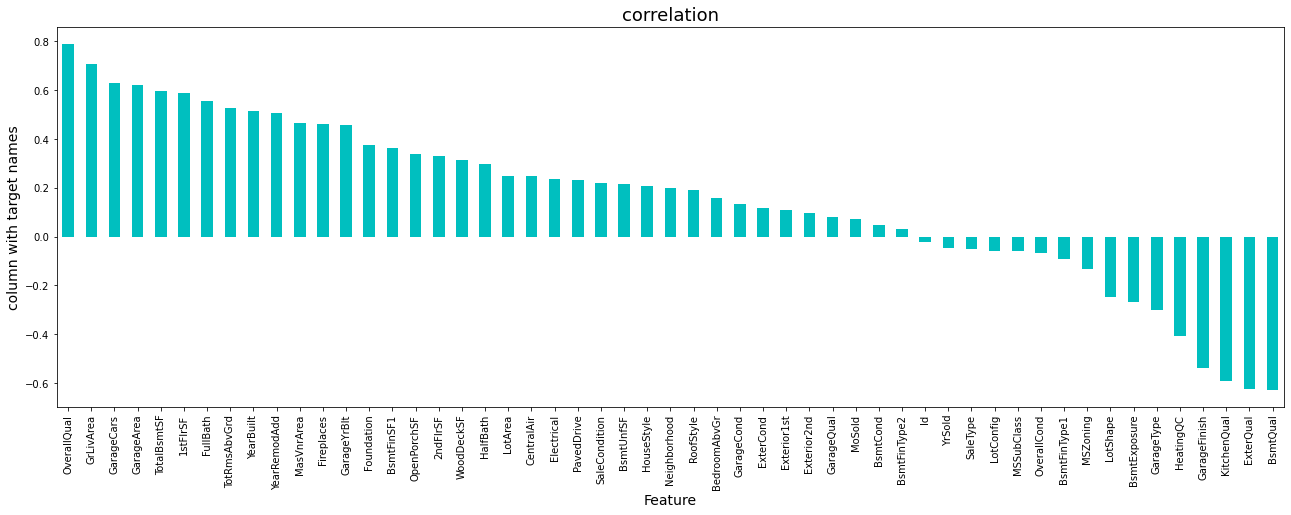

In [204]:
plt.figure(figsize=(22,7))
cor['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# SKEWNESS REMOVAL

In [205]:
df.skew()

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotArea          10.659285
LotShape         -0.603775
LotConfig        -1.118821
Neighborhood      0.043735
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrArea        2.834658
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1        1.871606
BsmtFinType2     -3.615783
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
HeatingQC         0.449933
CentralAir       -3.475188
Electrical       -3.104209
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenQual      -1.408106
T

# SPLITTING X AND Y AND APPLYING POWER TRANSFORMER TO AVOID SKEWNESS

In [206]:
from sklearn.preprocessing import PowerTransformer

In [207]:
x=df.drop("SalePrice",axis=1)
y=df["SalePrice"]

In [208]:
x

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,127,120,3.0,4928,0.0,4.0,13.0,2.0,6,5,...,440,4.0,4.0,2.0,0,205,2,2007,8.0,4.0
1,889,20,3.0,15865,0.0,4.0,12.0,2.0,8,6,...,621,4.0,4.0,2.0,81,207,10,2007,8.0,4.0
2,793,60,3.0,9920,0.0,1.0,15.0,5.0,7,5,...,455,4.0,4.0,2.0,180,130,6,2007,8.0,4.0
3,110,20,3.0,11751,0.0,4.0,14.0,2.0,6,6,...,546,4.0,4.0,2.0,0,122,1,2010,0.0,4.0
4,422,20,3.0,16635,0.0,2.0,14.0,2.0,6,7,...,529,4.0,4.0,2.0,240,0,6,2009,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3.0,9819,0.0,4.0,19.0,2.0,5,5,...,280,4.0,4.0,2.0,0,0,2,2010,8.0,4.0
1164,554,20,3.0,8777,3.0,4.0,7.0,2.0,4,5,...,520,4.0,4.0,0.0,0,96,5,2009,8.0,4.0
1165,196,160,3.0,2280,3.0,2.0,13.0,5.0,6,6,...,440,4.0,4.0,2.0,87,0,7,2009,8.0,4.0
1166,31,70,0.0,8500,3.0,4.0,9.0,5.0,4,4,...,250,4.0,1.0,0.0,0,54,7,2008,8.0,4.0


In [209]:
x.shape

(1168, 53)

In [210]:
y

0       128000
1       268000
2       269790
3       190000
4       215000
         ...  
1163    122000
1164    108000
1165    148500
1166     40000
1167    183200
Name: SalePrice, Length: 1168, dtype: int64

In [211]:
y.shape

(1168,)

In [212]:
pt=PowerTransformer(method="yeo-johnson")

In [213]:
X_power=pt.fit_transform(x)

In [214]:
df=pd.DataFrame(X_power,columns=x.columns)

In [215]:
df.skew()

Id              -0.268486
MSSubClass       0.064007
MSZoning         0.233113
LotArea          0.032509
LotShape        -0.594207
LotConfig       -1.030401
Neighborhood    -0.146541
HouseStyle      -0.080331
OverallQual      0.021658
OverallCond      0.048063
YearBuilt       -0.126641
YearRemodAdd    -0.225131
RoofStyle       -0.292233
Exterior1st     -0.338023
Exterior2nd     -0.352793
MasVnrArea       0.416370
ExterQual       -0.605112
ExterCond       -2.270791
Foundation       0.004296
BsmtQual        -0.413999
BsmtCond        -3.025865
BsmtExposure    -0.914214
BsmtFinType1    -0.206639
BsmtFinSF1      -0.404528
BsmtFinType2    -2.420885
BsmtUnfSF       -0.284390
TotalBsmtSF      0.286779
HeatingQC        0.156511
CentralAir      -3.475188
Electrical      -3.006845
1stFlrSF        -0.002391
2ndFlrSF         0.280208
GrLivArea       -0.000054
FullBath        -0.045944
HalfBath         0.498003
BedroomAbvGr     0.116498
KitchenQual     -0.435558
TotRmsAbvGrd     0.002332
Fireplaces  

# MULTICOLLINEARITY

USING VIF FOR CHECKING MULTICOLLINEARITY

In [216]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [217]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [218]:
vif_calc()

      VIF Factor       Features
0       4.229393             Id
1       4.228406     MSSubClass
2      30.842313       MSZoning
3       3.177605        LotArea
4       3.516864       LotShape
5       4.852799      LotConfig
6       6.243643   Neighborhood
7       7.104585     HouseStyle
8      74.040181    OverallQual
9      47.101633    OverallCond
10  30463.670837      YearBuilt
11  25973.245719   YearRemodAdd
12      4.826011      RoofStyle
13     36.997586    Exterior1st
14     35.291756    Exterior2nd
15      1.938694     MasVnrArea
16     36.795489      ExterQual
17     31.287845      ExterCond
18      9.780734     Foundation
19     18.126551       BsmtQual
20     21.329810       BsmtCond
21      7.046542   BsmtExposure
22      6.279133   BsmtFinType1
23     36.558556     BsmtFinSF1
24     62.789385   BsmtFinType2
25     47.242245      BsmtUnfSF
26    134.622567    TotalBsmtSF
27      2.965526      HeatingQC
28     22.499310     CentralAir
29     18.088381     Electrical
30    71

In [219]:
df.drop(['YrSold','GarageYrBlt','GrLivArea','1stFlrSF','TotalBsmtSF','YearRemodAdd','BsmtFinType2'],axis=1,inplace=True)

# SCALING FEATURES

In [220]:
from sklearn.preprocessing import StandardScaler

In [221]:
sc=StandardScaler()

In [222]:
x=sc.fit_transform(x)

In [223]:
x

array([[-1.43548658,  1.50830058, -0.02164599, ..., -0.60548713,
         0.33003329,  0.20793187],
       [ 0.39632483, -0.87704243, -0.02164599, ..., -0.60548713,
         0.33003329,  0.20793187],
       [ 0.16554544,  0.07709478, -0.02164599, ..., -0.60548713,
         0.33003329,  0.20793187],
       ...,
       [-1.26961389,  2.46243779, -0.02164599, ...,  0.8992128 ,
         0.33003329,  0.20793187],
       [-1.66626597,  0.31562908, -4.76211672, ...,  0.14686284,
         0.33003329,  0.20793187],
       [-0.25755011,  0.07709478, -0.02164599, ..., -1.3578371 ,
         0.33003329,  0.20793187]])

# SPLITTING AND APPLYING ALGORITHMS

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=15)

In [226]:
x_train.shape

(817, 53)

In [227]:
x_test.shape

(351, 53)

In [228]:
y_train.shape

(817,)

In [229]:
y_test.shape

(351,)

# APPLYING DIFFERENT REGRESSION ALGORITHMS

# LINEAR REGRESSION

In [230]:
from sklearn.linear_model import LinearRegression

In [231]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [232]:
lm=LinearRegression()

In [233]:
lm.fit(x_train,y_train)

LinearRegression()

In [234]:
pred=lm.predict(x_test)

In [235]:
print(pred)

[147303.16726512 216396.97070511 132250.66090095 133578.18019344
 207060.3714819  185050.56693522  38321.3111889  189554.50391667
 242656.28137045 204696.61791461  99417.707922   260364.45463477
 188941.36434466 315665.9531263  130636.99867147 410824.30924634
 202403.30094111  89995.99449194 316671.60091371 268247.77896758
 342534.25873344  45652.43638146 188351.62367108 258517.16838791
 150129.6643407  146159.89264259 223288.67552392  90106.66742935
 155082.67929681 141916.25133895 120429.6405278  146223.41222455
 238641.86089531 271622.61824616 254778.22002192  97882.95918231
 293562.56312158 148367.30665716 132200.28292932 159904.7549438
 206665.05030317 105660.62927171 262743.87052601 195439.14143173
 115527.87154644 108393.48964797 153804.49582004 171429.81806023
 227753.49225178 193965.37134581 247038.11742331 148842.19620263
 140104.03303603 327954.26050717 173155.27033345 149979.7175877
 216244.78677052 115605.48801473  92278.39860787 252950.62693797
 297668.87868811 141249.048

In [236]:
print("mean absolute error:",mean_absolute_error(y_test,pred))

mean absolute error: 22313.142027346483


In [237]:
print("mean squred error:",mean_squared_error(y_test,pred))

mean squred error: 1456237723.216007


In [238]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

root mean squared error: 38160.68295007319


In [239]:
from sklearn.metrics import r2_score

In [241]:
lmscore=r2_score(y_test,pred)

In [242]:
print(lmscore)

0.7739382975040668


# SUPPORT VECTOR REGRESSOR

In [243]:
from sklearn.svm import SVR

In [244]:
svr=SVR(kernel="linear")

In [245]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [246]:
svrpred=svr.predict(x_test)

In [247]:
print(svrpred)

[159934.90298601 168896.16149459 161520.43381165 158758.37226814
 169695.8941472  159931.43800981 153175.29399539 161035.4128151
 170125.579889   166443.32413362 161682.01570736 171905.08315125
 160393.25717944 175101.18741683 161779.69794605 179771.64358722
 160661.03440506 154653.95064861 172880.76601709 172490.56249337
 172597.20739464 153076.84997666 165159.21526943 173017.80303893
 160107.2578595  160176.19853128 168681.80410626 157145.32880875
 160026.69044115 163099.77993674 158449.33835029 159981.26458098
 165231.02711046 170949.99181853 168902.49260611 156644.93137828
 174268.58140165 160536.65829074 161952.3771661  160470.05248524
 165004.15601495 159858.05771129 171399.32060554 168983.4220468
 160001.11157473 158930.54556833 162911.45416753 167171.78670527
 170177.14095995 163460.78772277 170019.08594657 163329.71196604
 164269.92017165 176553.08917622 161905.29247698 158744.72168458
 167091.21032177 157498.22309466 153523.87274573 171654.38179497
 173693.34234471 160199.468

In [248]:
print("mean absolute error:",mean_absolute_error(y_test,svrpred))

mean absolute error: 51705.988255919256


In [250]:
print("mean squred error:",mean_squared_error(y_test,svrpred))

mean squred error: 5993249238.650703


In [251]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,svrpred)))

root mean squared error: 77416.07868298874


In [252]:
svrscore=r2_score(y_test,svrpred)

In [253]:
print(svrscore)

0.0696270912555762


# DECISION TREE REGRESSOR

In [254]:
from sklearn.tree import DecisionTreeRegressor

In [255]:
dtr=DecisionTreeRegressor()

In [256]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [257]:
dtrpred=dtr.predict(x_test)

In [258]:
print(dtrpred)

[130000. 197000. 132500. 144000. 231500. 117500. 103600. 184100. 227875.
 180000. 128500. 281213. 127000. 283463. 120000. 369900. 140000.  79000.
 277500. 268000. 611657. 109500. 194500. 324000. 130000. 127000. 205000.
 110000. 180000. 137000. 129900. 178000. 127500. 277000. 220000.  85000.
 325000. 167000. 140000. 140000. 165000. 133000. 220000. 178900. 135960.
 106000. 144900. 127000. 239500. 185000. 274300. 149000. 146500. 325000.
 127500. 128000. 328000. 118000.  83000. 299800. 295000. 135000. 185750.
  60000. 235000. 485000. 180000. 120500. 179900. 392500. 175900. 171000.
 190000. 380000. 335000. 150750. 151500. 178900. 361919. 141000. 179500.
 137500. 135000. 202500. 165600. 135000. 119000. 290000. 171000. 189000.
 115000. 167500. 209500. 189000. 128500. 139000. 175900. 129500. 192000.
 485000. 160200. 183000. 210000. 317000. 195400. 239000.  60000. 181500.
 239900. 130500. 106500. 197000. 102000. 157900. 110500. 238000. 213490.
 277000. 167000. 130500. 135960. 205000. 202500. 13

In [259]:
print("mean absolute error:",mean_absolute_error(y_test,dtrpred))

mean absolute error: 30930.91737891738


In [260]:
print("mean squred error:",mean_squared_error(y_test,dtrpred))

mean squred error: 2442052065.3675213


In [261]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,dtrpred)))

root mean squared error: 49417.12320003585


In [262]:
dtrscore=r2_score(y_test,dtrpred)

In [263]:
print(dtrscore)

0.6209036212428867


# K-neighbor regressor

In [264]:
from sklearn.neighbors import KNeighborsRegressor

In [265]:
knnr=KNeighborsRegressor()

In [266]:
knnr.fit(x_train,y_train)

KNeighborsRegressor()

In [267]:
knnrpred=knnr.predict(x_test)

In [268]:
print(knnrpred)

[135700.  211865.6 128500.  127600.  191700.  136072.8 104000.  141200.
 222900.  200658.  115100.  209200.  151100.  261360.  164000.  423859.6
 165290.   89877.4 303338.8 260550.  371300.  112196.8 172600.  290800.
 137200.  128900.  203600.  130440.  150725.  152770.  122300.  153440.
 154500.  261300.  206000.  118100.  302542.6 143100.  150490.  131300.
 171700.  140350.  210130.  203900.  146180.  123300.  141500.  162900.
 197380.  172680.  227600.  154892.  174300.  304200.  144100.  145920.
 188600.  124880.  122120.  207560.  314950.  138860.  164950.  131370.
 217600.  237200.  135160.  120400.  127600.  251980.  173000.  166900.
 248962.6 233260.  365383.8 154257.  134080.  182480.  265080.  143480.
 200738.  164500.  115310.  214969.  171000.  206980.  114500.  251980.
 165880.  252100.  116980.  136580.  202800.  188780.  136200.  145590.
 162140.  207290.  193100.  547120.8 145580.  215500.  147320.  309498.8
 193390.  223900.  128790.  167000.  246664.4 127390.  124846.

In [269]:
print("mean absolute error:",mean_absolute_error(y_test,knnrpred))

mean absolute error: 23558.894017094015


In [270]:
print("mean squred error:",mean_squared_error(y_test,knnrpred))

mean squred error: 1788691889.4273505


In [271]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,knnrpred)))

root mean squared error: 42292.92954416081


In [272]:
knnrscore=r2_score(y_test,knnrpred)

In [273]:
print(knnrscore)

0.7223291724158725


# CROSS VALIDATION MEAN SCORE

In [274]:
from sklearn.model_selection import cross_val_score

In [275]:
print(cross_val_score(lm,x,y,cv=5).mean())

0.7766441480982148


In [276]:
print(cross_val_score(svr,x,y,cv=5).mean())

0.0866109385146335


In [277]:
print(cross_val_score(dtr,x,y,cv=5).mean())

0.6852383491903541


In [278]:
print(cross_val_score(knnr,x,y,cv=5).mean())

0.7585495500050444


# HYPER PARAMETER TUNING FOR LINEAR REGRESSION

In [279]:
from sklearn.model_selection import GridSearchCV

In [280]:
parameter={'fit_intercept':['bool'],
          'normalize':['bool'],
          'copy_X':['bool'],
           'n_jobs':[1,10,100,1000]}

In [281]:
GCV=GridSearchCV(LinearRegression(),parameter,cv=5)

In [282]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['bool'], 'fit_intercept': ['bool'],
                         'n_jobs': [1, 10, 100, 1000], 'normalize': ['bool']})

In [283]:
GCV.best_params_

{'copy_X': 'bool', 'fit_intercept': 'bool', 'n_jobs': 1, 'normalize': 'bool'}

In [284]:
Final_HOUSINGmodel=LinearRegression(copy_X='bool',
 fit_intercept='bool',
 normalize='bool',
  n_jobs=1)

In [285]:
Final_HOUSINGmodel.fit(x_train,y_train)

LinearRegression(copy_X='bool', fit_intercept='bool', n_jobs=1,
                 normalize='bool')

In [287]:
Finalpred=Final_HOUSINGmodel.predict(x_test)

In [288]:
Finalr2score=r2_score(y_test,Finalpred)

In [289]:
print(Finalr2score)

0.7739382975040666


# saving and conclusion of model

In [291]:
Finalconclusion=pd.DataFrame([Final_HOUSINGmodel.predict(x_test)[:],Finalpred[:]],index=["Predicted","Orginal"])

In [292]:
Finalconclusion

,0,1,2,3,4,5,6,7,8,9,...,341,342,343,344,345,346,347,348,349,350
Predicted,147303.167265,216396.970705,132250.660901,133578.180193,207060.371482,185050.566935,38321.311189,189554.503917,242656.28137,204696.617915,...,151866.354063,129736.654207,191124.512575,218250.242217,155863.443076,83029.216767,135801.789793,94335.744553,154755.903779,225561.894293
Orginal,147303.167265,216396.970705,132250.660901,133578.180193,207060.371482,185050.566935,38321.311189,189554.503917,242656.28137,204696.617915,...,151866.354063,129736.654207,191124.512575,218250.242217,155863.443076,83029.216767,135801.789793,94335.744553,154755.903779,225561.894293


# SAVING

In [294]:
import joblib

In [295]:
joblib.dump(Final_HOUSINGmodel,"Final_HOUSINGmodel.obj")

['Final_HOUSINGmodel.obj']

# TEST DATA FOR VALIDATION

# PREPROSESSING FOR TEST DATA

In [296]:
df1#test data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


# PREPROCESSING OF TEST DATA

In [297]:
df1.drop(['Street','Alley','PoolQC','Fence','MiscFeature','LotFrontage','FireplaceQu','LandContour','LandSlope','Condition2','Condition1','BldgType','RoofMatl','Heating','Functional','BsmtFinSF2','LowQualFinSF','BsmtFullBath','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MasVnrType','Utilities'],axis=1,inplace=True)

In [298]:
df1


,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,14157,IR1,Corner,StoneBr,1Story,9,5,...,676,TA,TA,Y,178,51,7,2007,WD,Normal
1,1018,120,RL,5814,IR1,CulDSac,StoneBr,1Story,8,5,...,565,TA,TA,Y,63,0,8,2009,COD,Abnorml
2,929,20,RL,11838,Reg,Inside,CollgCr,1Story,8,5,...,522,TA,TA,Y,202,151,6,2009,WD,Normal
3,1148,70,RL,12000,Reg,Inside,Crawfor,2Story,7,7,...,234,TA,TA,Y,0,0,7,2009,WD,Normal
4,1227,60,RL,14598,IR1,CulDSac,Somerst,2Story,6,5,...,668,TA,TA,Y,100,18,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,10206,Reg,Inside,Somerst,1Story,8,5,...,758,TA,TA,Y,144,99,10,2008,WD,Normal
288,1048,20,RL,9245,IR2,Inside,CollgCr,1Story,5,5,...,672,TA,TA,Y,0,0,2,2008,WD,Normal
289,17,20,RL,11241,IR1,CulDSac,NAmes,1Story,6,7,...,480,TA,TA,Y,0,0,3,2010,WD,Normal
290,523,50,RM,5000,Reg,Corner,BrkSide,1.5Fin,6,7,...,420,TA,TA,Y,0,24,10,2006,WD,Normal


# treating null values

for treating null values categorical data handle by mode and contineous data handle by mean

In [307]:
df1['MasVnrArea']=df1['MasVnrArea'].fillna(df1['MasVnrArea'].mean())

In [308]:
df1['BsmtQual']=df1['BsmtQual'].fillna(df1['BsmtQual'].mode()[0])

In [309]:
df1['BsmtCond']=df1['BsmtCond'].fillna(df1['BsmtCond'].mode()[0])

In [310]:
df1['BsmtExposure']=df1['BsmtExposure'].fillna(df1['BsmtExposure'].mode()[0])

In [311]:
df1['BsmtFinType1']=df1['BsmtFinType1'].fillna(df1['BsmtFinType1'].mode()[0])

In [312]:
df1['BsmtFinType2']=df1['BsmtFinType2'].fillna(df1['BsmtFinType2'].mode()[0])

In [313]:
df1['GarageType']=df1['GarageType'].fillna(df1['GarageType'].mode()[0])

In [314]:
df1['GarageYrBlt']=df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].mean())

In [315]:
df1['GarageFinish']=df1['GarageFinish'].fillna(df1['GarageFinish'].mode()[0])

In [316]:
df1['GarageQual']=df1['GarageQual'].fillna(df1['GarageQual'].mode()[0])

In [317]:
df1['GarageCond']=df1['GarageCond'].fillna(df1['GarageCond'].mode()[0])

In [319]:
df1['Electrical']=df1['Electrical'].fillna(df1['Electrical'].mode()[0])

In [320]:
df1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
MoSold           0
YrSold           0
SaleType         0
SaleConditio

<AxesSubplot:>

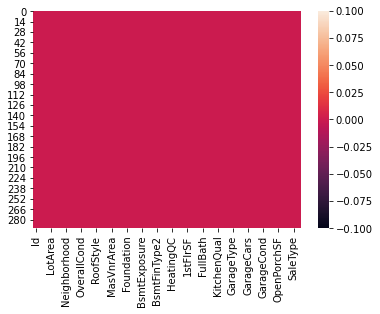

In [321]:
sn.heatmap(df1.isnull())

# ENCODING

In [322]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [327]:
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=enc.fit_transform(df1[i].values.reshape(-1,1))

# using loaded model for prediction

In [329]:
Final_HOUSINGmodel_from_joblib=joblib.load("Final_HOUSINGmodel.obj")

In [330]:
testpred=Final_HOUSINGmodel_from_joblib.predict(x)

In [331]:
print(testpred)

[141916.25133895 263564.50533429 245263.95203981 ... 150056.27243439
  60515.89143569 195439.14143173]


# saved the prediction as CSV

In [332]:
Housingprediction=pd.DataFrame(testpred,columns=["testpred"]).to_csv("testpred.csv")